# WeGo Brake it Easy CLEANING

## DIRECTIONS: 
1) Make sure this notebook is in the "notebooks" folder within the wego-brake-it-easy root directory, and your CSV is in the "data" folder within that same root. Read_csv path should be "../data/Headway Data, 8-1-2023 to 9-30-2023.csv"
2) Open this notebook and run all cells.

## EXERCISE README

WeGo Public Transit is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

The data for this project can be downloaded from here: <https://drive.google.com/file/d/1iM4WjC9k3EXHPNc6q4AwDh_MEIpXvfMD/view>.

In this project, you'll be analyzing the on-time performance of buses to look for patterns and try to identify correlations to controllable or external factors.

The main variable you will be studying in this project is adherence, which compares the actual departure time to the scheduled time and is included in the ADHERENCE column. A negative adherence value means that a bus left a time point late and a positive adherence indicates that the bus left the time point early. Buses with adherence values beyond negative 6 are generally considered late and beyond positive 1 are considered early. However, there is some additional logic where the staff applies waivers to allow early departures, such as an express bus that has already picked up everyone at a park-and-ride lot and is only dropping people off at the remaining stops, and also allows for early timepoint records for all records where TRIP_EDGE = 2 (end of trip), since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. Note: When determining whether a bus is early or late, it is advised that you use the 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', and 'ADJUSTED_ONTIME_COUNT' columns in order to account for the adjustments.

**Goals of this project:**

1) What is the overall on-time performance, and what do the overall distribution of adherence look like?
2) How does direction of travel, route, or location affect the on-time performance?
3) How does time of day or day of week affect on-time performance?
4) How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.
5) Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

**Stretch Goals:**

6) How much impact does being late or too spaced out at the first stop have downstream?
7) What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?
8) What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?
9) Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

## EXERCISE Data Dictionary

A trip is defined as one run of the vehicle from one end of the route to another in one direction. Two trips = one round trip. The TRIP_ID field provides a unique indicator for each trip.

A trip has more stops than are recorded in this data. The stops with data are called Time Points, and these are the points along the route with specific scheduled times that bus operators must adhere to (i.e. they are not allowed to depart early from these stops). There are many intermediate stops in between, but we generally focus on the Time Points as a meaningful subset. All stops can be included, but the datasets become quite large. The values are captured by our vehicle tracking system, which uses a combination of GPS and an onboard computer with login information entered by the driver to match the vehicle to a given scheduled trip, route, and direction.

**Dataset Columns:**  
CALENDAR_ID: Identifier for the date  
SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
ADHERENCE_ID: Unique identifier for each record  
DATE: Trip date  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pike
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is on  
OPERATOR: Indicates the operator (driver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from downtown  
TIME_POINT_ABBR: Identifies the time point of the record.  
ROUTE_STOP_SEQUENCE: Identifies the stop point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)  
LATITUDE/LONGITUDE: Location in lat/long  
SCHEDULED_TIME: scheduled time  
ACTUAL_ARRIVAL_TIME: actual arrival time  
ACTUAL_DEPARTURE_TIME: actual departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled time for that stop  
ACTUAL_HDWY: Actual headway; Notably, does not exclude overloads, as we want to know about them for actual headway performance  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  
ADJUSTED_EARLY_COUNT: 	
ADJUSTED_LATE_COUNT: 	
ADJUSTED_ONTIME_COUNT: 
STOP_CANCELLED:	flags whether a crossing was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new driver on the bus/block	  
BLOCK_STOP_ORDER:   
DWELL_IN_MINS: Actual Departure Time - Actual Arrival Time (in minutes)
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 

## EXERCISE WeGo Data Introduction

In [2]:
import pandas as pd, numpy as np
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [4]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [5]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [6]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [10]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [11]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


## Step 0) Setup and Parsing

In [12]:
# =========================
# 0) Setup & Parsing (Idempotent, safe to re-run)
# =========================
# (comments unchanged above…)

import pandas as pd, numpy as np
from pathlib import Path
pd.options.mode.copy_on_write = True

in_path = "../data/headway_data.csv"
out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)

wego = pd.read_csv(in_path, dtype=str, na_values=["", "NA", "NaN", "null", None])

_num = lambda s: pd.to_numeric(s, errors="coerce")
if "SERVICE_ABBR" in wego.columns:
    wego["SERVICE_ABBR"] = _num(wego["SERVICE_ABBR"]).astype("Int64")
if "ROUTE_ABBR" in wego.columns:
    wego["ROUTE_ABBR"] = _num(wego["ROUTE_ABBR"]).astype("Int64")
if "STOP_CANCELLED" in wego.columns:
    wego["STOP_CANCELLED"] = _num(wego["STOP_CANCELLED"]).fillna(0).astype(int)
if "TRIP_ID" in wego.columns:
    wego["TRIP_ID"] = _num(wego["TRIP_ID"]).astype("Int64")
if "CALENDAR_ID" in wego.columns:
    wego["CALENDAR_ID"] = _num(wego["CALENDAR_ID"]).astype("Int64")

wego = wego.copy()

for c in ["DATE","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"]:
    if c in wego.columns:
        wego[c] = pd.to_datetime(wego[c], errors="coerce")

cal = wego.get("CALENDAR_ID")
tid = wego.get("TRIP_ID")
wego["trip_key"] = (
    (cal.astype("string") if cal is not None else pd.Series(index=wego.index, dtype="string")).fillna("UNK")
    + "_"
    + (tid.astype("string") if tid is not None else pd.Series(index=wego.index, dtype="string")).fillna("UNK")
)

PEAK_AM = (7, 9)
PEAK_PM = (16, 18)

if "DATE" in wego.columns:
    wego["dow"]  = wego["DATE"].dt.day_name()
if "SCHEDULED_TIME" in wego.columns:
    wego["hour"] = wego["SCHEDULED_TIME"].dt.hour
    wego["peak"] = np.where(
        wego["hour"].between(*PEAK_AM) | wego["hour"].between(*PEAK_PM),
        "Peak", "Off-peak"
    )

service_map = {1:"Weekday", 2:"Saturday", 3:"Sunday"}
wego["service_type"] = (
    wego["SERVICE_ABBR"].map(service_map).fillna("Other")
    if "SERVICE_ABBR" in wego.columns else "Other"
)

for c in ["ROUTE_DIRECTION_NAME","dow","service_type","peak"]:
    if c in wego.columns:
        wego[c] = wego[c].astype("category")

route_names = {
    3:'West End', 7:'Hillsboro', 22:'Bordeaux', 23:'Dickerson Pike',
    50:'Charlotte Pike', 52:'Nolensville Pike', 55:'Murfreesboro Pike', 56:'Gallatin Pike'
}
if "ROUTE_ABBR" in wego.columns:
    wego["route_name"] = wego["ROUTE_ABBR"].map(route_names).astype("string").fillna(wego["ROUTE_ABBR"].astype("string"))

timepoint_seeds = {}

if "timepoint_name" not in wego.columns:
    wego["timepoint_name"] = pd.NA
if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].astype(str).map(timepoint_seeds))

def _gtfs_stops_or_none(url="https://www.wegotransit.com/GoogleExport/google_transit.zip"):
    try:
        import io, zipfile, requests
        r = requests.get(url, timeout=60)
        r.raise_for_status()
        zf = zipfile.ZipFile(io.BytesIO(r.content))
        stops = pd.read_csv(zf.open("stops.txt"))
        return stops[["stop_id","stop_code","stop_name","stop_lat","stop_lon"]].copy()
    except Exception:
        return None

stops = _gtfs_stops_or_none()
if stops is not None and "TIME_POINT_ABBR" in wego.columns:
    wego["TIME_POINT_ABBR_str"] = wego["TIME_POINT_ABBR"].astype(str)
    stops["stop_code_str"] = stops["stop_code"].astype(str)
    w1 = wego.merge(
        stops[["stop_code_str","stop_name"]],
        left_on="TIME_POINT_ABBR_str", right_on="stop_code_str", how="left"
    )
    wego["timepoint_name"] = wego["timepoint_name"].fillna(w1["stop_name"])
    need_nn = (
        wego["timepoint_name"].isna()
        & wego.get("LATITUDE", pd.Series(index=wego.index)).notna()
        & wego.get("LONGITUDE", pd.Series(index=wego.index)).notna()
    )
    if need_nn.any():
        try:
            from scipy.spatial import cKDTree
            LAT_M = 111_132.0
            LON_M = 111_132.0 * np.cos(np.deg2rad(36.1627))
            stops_xy = np.c_[stops["stop_lat"]*LAT_M, stops["stop_lon"]*LON_M]
            tree = cKDTree(stops_xy)
            wego_nn = wego.loc[need_nn, ["TIME_POINT_ABBR","LATITUDE","LONGITUDE"]].dropna()
            wego_xy = np.c_[wego_nn["LATITUDE"].astype(float)*LAT_M, wego_nn["LONGITUDE"].astype(float)*LON_M]
            dist, idx = tree.query(wego_xy, k=1)
            nn = wego_nn.assign(
                nearest_stop_name = stops.iloc[idx]["stop_name"].values,
                nn_dist_m = dist
            )
            nn_good = nn.loc[nn["nn_dist_m"] <= 100, ["TIME_POINT_ABBR","nearest_stop_name"]]
            tp_lookup = (
                nn_good.groupby("TIME_POINT_ABBR")["nearest_stop_name"]
                       .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
            )
            fill_mask = wego["timepoint_name"].isna()
            wego.loc[fill_mask, "timepoint_name"] = wego.loc[fill_mask, "TIME_POINT_ABBR"].map(tp_lookup)
        except Exception:
            if {"LATITUDE","LONGITUDE"}.issubset(wego.columns):
                wego["lat_r"] = wego["LATITUDE"].astype(float).round(4)
                wego["lon_r"] = wego["LONGITUDE"].astype(float).round(4)
                stops["lat_r"] = stops["stop_lat"].round(4)
                stops["lon_r"] = stops["stop_lon"].round(4)
                w2 = wego.merge(stops[["lat_r","lon_r","stop_name"]], on=["lat_r","lon_r"], how="left")
                fill_mask = wego["timepoint_name"].isna()
                wego.loc[fill_mask, "timepoint_name"] = w2.loc[fill_mask, "stop_name"]

if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"])

# 0.5 Headway features, OTP-ready filtering, policy flags & labels
# ----------------------------------------------------------------
# Headway features — guard against SCHEDULED_HDWY <= 0
hdwy_dev_raw   = pd.to_numeric(wego.get("HDWY_DEV"), errors="coerce")
sched_hdwy_raw = pd.to_numeric(wego.get("SCHEDULED_HDWY"), errors="coerce")

# Valid only when scheduled headway is strictly positive
wego["hdwy_valid"] = sched_hdwy_raw.gt(0)

# >>> FIX: sanitize SCHEDULED_HDWY/HDWY_DEV so DF_FULL contains no non-positive values <<<
# (a) keep a count of non-positive values for the DQ print
nonpos_sched_hdwy_count = int((sched_hdwy_raw <= 0).fillna(False).sum())
# (b) coerce invalid scheduled headways to NaN in the canonical columns
wego["SCHEDULED_HDWY"] = np.where(wego["hdwy_valid"], sched_hdwy_raw, np.nan)
# (c) also null-out HDWY_DEV where scheduled headway is invalid (avoids accidental use)
wego["HDWY_DEV"] = np.where(wego["hdwy_valid"], hdwy_dev_raw, np.nan)

# Compute % deviation only for valid rows; otherwise NaN
wego["hdwy_pct_dev"] = wego["HDWY_DEV"] / wego["SCHEDULED_HDWY"]

# Visual-only helper (never use for metrics)
wego["hdwy_pct_dev_clip"] = wego["hdwy_pct_dev"].clip(0, 3)

# OTP-ready subset (keep a “full” copy separately)
wego_all = wego
mask_keep = (
    wego_all.get("SCHEDULED_TIME", pd.Series(index=wego_all.index)).notna()
    & wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series(index=wego_all.index)).notna()
    & (wego_all.get("STOP_CANCELLED", pd.Series(index=wego_all.index, dtype=int)).fillna(0) != 1)
)
wego_otp = wego_all.loc[mask_keep].copy()

for col, src in [("is_early","ADJUSTED_EARLY_COUNT"),
                 ("is_late","ADJUSTED_LATE_COUNT"),
                 ("is_ontime","ADJUSTED_ONTIME_COUNT")]:
    if src in wego_otp.columns:
        wego_otp[col] = (_num(wego_otp[src]).fillna(0) > 0).astype(int)
    else:
        wego_otp[col] = 0

if "TRIP_EDGE" in wego_otp.columns:
    at_end = (_num(wego_otp["TRIP_EDGE"]) == 2)
    to_convert = (at_end) & (wego_otp["is_early"] == 1) & (wego_otp["is_late"] == 0)
    if to_convert.any():
        print(f"End-of-trip early→on-time conversions: {int(to_convert.sum()):,}")
    wego_otp.loc[to_convert, ["is_early","is_ontime"]] = (0, 1)

conflict = (wego_otp["is_early"] + wego_otp["is_late"]) > 1
if conflict.any():
    print(f"Warning: {int(conflict.sum()):,} rows flagged both Early and Late; keeping Late precedence in labels.")

wego_otp["otp_label"] = np.select(
    [wego_otp["is_ontime"].eq(1), wego_otp["is_late"].eq(1), wego_otp["is_early"].eq(1)],
    ["On-time","Late","Early"], default="Unclassified"
)

if "ADHERENCE" in wego_otp.columns:
    wego_otp["ADHERENCE"] = _num(wego_otp["ADHERENCE"])
    wego_otp["ADHERENCE_clip"] = wego_otp["ADHERENCE"].clip(-30, 15)

for col, fb in [("route_name","ROUTE_ABBR"), ("timepoint_name","TIME_POINT_ABBR")]:
    if col in wego_otp.columns and fb in wego_otp.columns:
        wego_otp[col] = wego_otp[col].fillna(wego_otp[fb].astype(str))

# Data-quality report (now includes the non-positive headway count)
dq = {
    "rows_total": len(wego_all),
    "rows_otp_kept": len(wego_otp),
    "pct_kept": f"{len(wego_otp)/max(1,len(wego_all)):.1%}",
    "missing_sched": int(wego_all.get("SCHEDULED_TIME", pd.Series()).isna().sum()),
    "missing_act_dep": int(wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series()).isna().sum()),
    "cancelled": int((wego_all.get("STOP_CANCELLED", pd.Series(dtype=int)).fillna(0)==1).sum()),
    "nonpos_sched_hdwy": nonpos_sched_hdwy_count,  # <<< added
}
print("Data Quality:", dq)

# 0.6 Exports … (unchanged below)
# ----------------------------------------------------------------
# A) By Route
if {"ROUTE_ABBR","is_ontime"}.issubset(wego_otp.columns):
    wego_by_route = (
        wego_otp.groupby("ROUTE_ABBR", as_index=False)
                .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
    )
    rn_map = wego_otp.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
    wego_by_route["route_name"] = rn_map.reindex(wego_by_route["ROUTE_ABBR"]).values
    wego_by_route = wego_by_route.sort_values(["otp","n"], ascending=[False, False])
    wego_by_route.to_csv(out_dir / "wego_by_route.csv", index=False, encoding="utf-8-sig")
else:
    wego_by_route = pd.DataFrame(columns=["ROUTE_ABBR","otp","n","route_name"])

# B) Trip Summary
if "trip_key" in wego_otp.columns:
    trip_summary = (
        wego_otp.groupby("trip_key", observed=True)
        .agg(
            ROUTE_ABBR=("ROUTE_ABBR","first"),
            route_dir=("ROUTE_DIRECTION_NAME","first"),
            service=("service_type","first"),
            start_time=("SCHEDULED_TIME","min"),
            end_time=("SCHEDULED_TIME","max"),
            n_tp=("is_ontime","size"),
            otp_rate=("is_ontime","mean"),
            mean_adh=("ADHERENCE","mean"),
            std_adh=("ADHERENCE","std"),
            hdwy_std=("hdwy_pct_dev","std"),
        )
        .reset_index()
    )
    if "OVERLOAD_ID" in wego_otp.columns:
        overload_map = (
            wego_otp.assign(_ov=_num(wego_otp["OVERLOAD_ID"]).fillna(0).ne(0))
                    .groupby("trip_key")["_ov"].any()
        )
        trip_summary["overload_seen"] = trip_summary["trip_key"].map(overload_map).fillna(False)
    else:
        trip_summary["overload_seen"] = False

    trip_summary["route_name"] = trip_summary["ROUTE_ABBR"].map(route_names)\
                                        .fillna(trip_summary["ROUTE_ABBR"].astype(str))
    trip_summary.to_csv(out_dir / "wego_trip_summary.csv", index=False, encoding="utf-8-sig")
else:
    trip_summary = pd.DataFrame(columns=[
        "trip_key","ROUTE_ABBR","route_dir","service","start_time","end_time",
        "n_tp","otp_rate","mean_adh","std_adh","hdwy_std","overload_seen","route_name"
    ])

# C) Timepoint Hotspots
_needed = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if _needed.issubset(wego_otp.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    dfg = wego_otp.loc[:, keys + ["is_late","is_early","is_ontime","route_name","timepoint_name"]].copy()
    dfg["ROUTE_ABBR"] = _num(dfg["ROUTE_ABBR"]).astype("Int64")
    dfg["ROUTE_DIRECTION_NAME"] = dfg["ROUTE_DIRECTION_NAME"].astype(str)
    dfg["TIME_POINT_ABBR"] = dfg["TIME_POINT_ABBR"].astype(str)

    tp_perf = (
        dfg.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )
    tp_perf["route_name"] = tp_perf["ROUTE_ABBR"].map(route_names).fillna(tp_perf["ROUTE_ABBR"].astype(str))
    tp_name_map = (
        wego_otp.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                .dropna(subset=["timepoint_name"])
                .drop_duplicates(subset=["TIME_POINT_ABBR"])
                .set_index("TIME_POINT_ABBR")["timepoint_name"]
    )
    tp_perf["timepoint_name"] = tp_perf["TIME_POINT_ABBR"].map(tp_name_map).fillna(tp_perf["TIME_POINT_ABBR"])
    tp_perf = tp_perf.sort_values(["late_rate","n"], ascending=[False, False])
    tp_perf.to_csv(out_dir / "wego_timepoint_hotspots.csv", index=False, encoding="utf-8-sig")
else:
    tp_perf = pd.DataFrame(columns=[
        "ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","late_rate","early_rate","otp_rate","n","route_name","timepoint_name"
    ])

# D) Enriched dumps
wego_all.to_csv(out_dir / "wego_enriched_full.csv", index=False, encoding="utf-8-sig")
wego_otp.to_csv(out_dir / "wego_otp_enriched_full.csv", index=False, encoding="utf-8-sig")

print("Exports complete → ../data/:")
print(" - wego_by_route.csv")
print(" - wego_trip_summary.csv")
print(" - wego_timepoint_hotspots.csv")
print(" - wego_enriched_full.csv")
print(" - wego_otp_enriched_full.csv")

# 0.7) In-memory DataFrames
df_full_enriched = wego_all.copy()
df_otp_enriched  = wego_otp.copy()
df_by_route      = wego_by_route.copy()
df_trip_summary  = trip_summary.copy()
df_timepoint_hotspots = tp_perf.copy()

# 0.8) Canonical Aliases
DF_FULL  = df_full_enriched
DF_OTP   = df_otp_enriched
BY_ROUTE = df_by_route
TRIPS    = df_trip_summary
TP_HOT   = df_timepoint_hotspots

print(
    "Aliases ready:\n"
    f" - DF_FULL:  {DF_FULL.shape}\n"
    f" - DF_OTP:   {DF_OTP.shape}\n"
    f" - BY_ROUTE: {BY_ROUTE.shape}\n"
    f" - TRIPS:    {TRIPS.shape}\n"
    f" - TP_HOT:   {TP_HOT.shape}"
)


C:\Users\joede\AppData\Local\Temp\ipykernel_30696\2851969252.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].astype(str).map(timepoint_seeds))


End-of-trip early→on-time conversions: 742
Data Quality: {'rows_total': 350329, 'rows_otp_kept': 335993, 'pct_kept': '95.9%', 'missing_sched': 0, 'missing_act_dep': 11468, 'cancelled': 5347, 'nonpos_sched_hdwy': 108}
Exports complete → ../data/:
 - wego_by_route.csv
 - wego_trip_summary.csv
 - wego_timepoint_hotspots.csv
 - wego_enriched_full.csv
 - wego_otp_enriched_full.csv
Aliases ready:
 - DF_FULL:  (350329, 41)
 - DF_OTP:   (335993, 46)
 - BY_ROUTE: (8, 4)
 - TRIPS:    (66244, 13)
 - TP_HOT:   (120, 9)


## README of Step 0 (explanation of new columns and tables created)

### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR` (e.g., Labor Day 9/4/2023 is “Sunday” service in this dataset). *(Q3)*

---

#### Headway Metrics

**`hdwy_valid` (bool)**  
**What:** Validity flag for headway math.  
**How:** `SCHEDULED_HDWY > 0`.  
**Why:** Prevents divide-by-zero and nonsense ratios; drives clean headway analytics.  
**Supports:** Q5, Q9.

**`SCHEDULED_HDWY` / `HDWY_DEV` (sanitized)**  
**What:** Source columns with invalid rows nulled.  
**How:** If `hdwy_valid == False`, set both **`SCHEDULED_HDWY`** and **`HDWY_DEV`** to `NaN`.  
**Why:** Keeps **DF_FULL**/exports tidy and avoids downstream misuse.  
**Supports:** Q5, Q9.

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` where `hdwy_valid == True`; else `NaN`.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching &nbsp;|&nbsp; >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

> **Note:** Use `hdwy_valid` (or naturally drop `NaN`s) when aggregating headway metrics.

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Booleans derived from `ADJUSTED_*_COUNT`; then apply the waiver: **if `TRIP_EDGE == 2` and not Late, convert Early → On-time**.  
**Why:** Honors WeGo waiver logic (early at end of trip is allowed; late at end still counts late).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

*Note:* Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Sanitization:** Non-positive `SCHEDULED_HDWY` → `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; **`hdwy_valid`** indicates rows suitable for headway analysis.  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`  
- Drop `STOP_CANCELLED == 1`  
- Apply waiver: **`TRIP_EDGE == 2` & not Late → Early becomes On-time**  
**Sanitization:** Headway fields mirror DF_FULL sanitization; use `hdwy_valid` for Q5/Q9.  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std` *(computed from sanitized headway fields)*  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:** `ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (e.g., <200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Start from `DF_OTP`, filter `hdwy_valid == True` (and optionally `PREV_SCHED_STOP_CANCELLED != 1`), then summarize median/mean absolute headway % deviation.

---

#### Why These Filters & Sanitization Matter

| Filter / Sanitization | Reason |
|-----------------------|--------|
| Missing times | Can’t compute OTP or adherence |
| `STOP_CANCELLED == 1` | Avoid penalizing waived stops |
| `TRIP_EDGE == 2` (Early → On-time if not Late) | Honors end-of-trip waiver policy |
| `SCHEDULED_HDWY <= 0` → set `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; add `hdwy_valid` | Prevent divide-by-zero; keep headway math honest |
| Clipping columns (`*_clip`) | Improves visualization clarity only; never used for KPIs |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook creates both in-memory DataFrames and canonical aliases so you can analyze immediately without re-importing CSVs.

---

#### 0.7 In-Memory DataFrames

| DataFrame | Mirrors CSV | Purpose |
|-----------|-------------|---------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). KPI/performance analyses. |
| `df_by_route` | `wego_by_route.csv` | OTP rate and sample size per route; rankings/summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | Trip-level adherence/OTP/headway stability; overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups for lateness/earliness/OTP. |

**Key Benefits**
- CSVs and DataFrames are built from the same pipeline (no drift).  
- Ready for Q1–Q9 immediately in memory.  
- Optional `load_exports()` helper can rebuild later from files.

#### 0.8 Canonical Aliases for Analysis

| Alias | Mirrors DataFrame | Purpose |
|-------|-------------------|---------|
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Auditing/QA/exploration. |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned subset. Default for KPI answers. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (top/bottom comparisons). |
| `TRIPS`    | `df_trip_summary`       | Trip-level dynamics & variability. |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level hotspots & map labels. |

**Why Aliases?** Clarity, consistency, flexibility (swap a lens once), and safety (original `df_*` stay intact).

**Quick Reference: Which Alias to Use (Q1–Q9)**

| Question | Primary Alias | Rationale |
|----------|---------------|-----------|
| Q1 – Overall OTP & distribution | `DF_OTP` | Policy-aligned on-time base. |
| Q2 – Route & direction differences | `BY_ROUTE`, `DF_OTP` | High-level OTP + direction splits. |
| Q3 – Time-of-day / Day-of-week | `DF_OTP` | Uses `hour`, `dow`, `peak`. |
| Q4 – Operator / block effects | `DF_OTP`, `TRIPS` | Route-operator OTP + trip variability. |
| Q5 – Headway reliability | `DF_OTP` (+ `hdwy_valid`) | Uses sanitized headway fields + `hdwy_valid`. |
| Q6 – First-stop impact | `TRIPS`, `DF_OTP` | Trip-level with within-trip context. |
| Q7 – Layover vs stability | `TRIPS` | Uses `hdwy_std`, `otp_rate`, `mean_adh`. |
| Q8 – Variability across routes | `TRIPS` | Compare variability by service/route. |
| Q9 – Spatial hotspots | `TP_HOT`, `DF_OTP` | Stop-level KPIs and labels. |


## Write README_tables_detailed to data folder

In [13]:
from pathlib import Path

markdown_text = """### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR` (e.g., Labor Day 9/4/2023 is “Sunday” service in this dataset). *(Q3)*

---

#### Headway Metrics

**`hdwy_valid` (bool)**  
**What:** Validity flag for headway math.  
**How:** `SCHEDULED_HDWY > 0`.  
**Why:** Prevents divide-by-zero and nonsense ratios; drives clean headway analytics.  
**Supports:** Q5, Q9.

**`SCHEDULED_HDWY` / `HDWY_DEV` (sanitized)**  
**What:** Source columns with invalid rows nulled.  
**How:** If `hdwy_valid == False`, set both **`SCHEDULED_HDWY`** and **`HDWY_DEV`** to `NaN`.  
**Why:** Keeps **DF_FULL**/exports tidy and avoids downstream misuse.  
**Supports:** Q5, Q9.

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` where `hdwy_valid == True`; else `NaN`.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching &nbsp;|&nbsp; >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

> **Note:** Use `hdwy_valid` (or naturally drop `NaN`s) when aggregating headway metrics.

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Booleans derived from `ADJUSTED_*_COUNT`; then apply the waiver: **if `TRIP_EDGE == 2` and not Late, convert Early → On-time**.  
**Why:** Honors WeGo waiver logic (early at end of trip is allowed; late at end still counts late).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

*Note:* Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Sanitization:** Non-positive `SCHEDULED_HDWY` → `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; **`hdwy_valid`** indicates rows suitable for headway analysis.  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`  
- Drop `STOP_CANCELLED == 1`  
- Apply waiver: **`TRIP_EDGE == 2` & not Late → Early becomes On-time**  
**Sanitization:** Headway fields mirror DF_FULL sanitization; use `hdwy_valid` for Q5/Q9.  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std` *(computed from sanitized headway fields)*  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:** `ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (e.g., <200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Start from `DF_OTP`, filter `hdwy_valid == True` (and optionally `PREV_SCHED_STOP_CANCELLED != 1`), then summarize median/mean absolute headway % deviation.

---

#### Why These Filters & Sanitization Matter

| Filter / Sanitization | Reason |
|-----------------------|--------|
| Missing times | Can’t compute OTP or adherence |
| `STOP_CANCELLED == 1` | Avoid penalizing waived stops |
| `TRIP_EDGE == 2` (Early → On-time if not Late) | Honors end-of-trip waiver policy |
| `SCHEDULED_HDWY <= 0` → set `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; add `hdwy_valid` | Prevent divide-by-zero; keep headway math honest |
| Clipping columns (`*_clip`) | Improves visualization clarity only; never used for KPIs |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook creates both in-memory DataFrames and canonical aliases so you can analyze immediately without re-importing CSVs.

---

#### 0.7 In-Memory DataFrames

| DataFrame | Mirrors CSV | Purpose |
|-----------|-------------|---------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). KPI/performance analyses. |
| `df_by_route` | `wego_by_route.csv` | OTP rate and sample size per route; rankings/summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | Trip-level adherence/OTP/headway stability; overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups for lateness/earliness/OTP. |

**Key Benefits**
- CSVs and DataFrames are built from the same pipeline (no drift).  
- Ready for Q1–Q9 immediately in memory.  
- Optional `load_exports()` helper can rebuild later from files.

#### 0.8 Canonical Aliases for Analysis

| Alias | Mirrors DataFrame | Purpose |
|-------|-------------------|---------|
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Auditing/QA/exploration. |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned subset. Default for KPI answers. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (top/bottom comparisons). |
| `TRIPS`    | `df_trip_summary`       | Trip-level dynamics & variability. |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level hotspots & map labels. |

**Why Aliases?** Clarity, consistency, flexibility (swap a lens once), and safety (original `df_*` stay intact).

**Quick Reference: Which Alias to Use (Q1–Q9)**

| Question | Primary Alias | Rationale |
|----------|---------------|-----------|
| Q1 – Overall OTP & distribution | `DF_OTP` | Policy-aligned on-time base. |
| Q2 – Route & direction differences | `BY_ROUTE`, `DF_OTP` | High-level OTP + direction splits. |
| Q3 – Time-of-day / Day-of-week | `DF_OTP` | Uses `hour`, `dow`, `peak`. |
| Q4 – Operator / block effects | `DF_OTP`, `TRIPS` | Route-operator OTP + trip variability. |
| Q5 – Headway reliability | `DF_OTP` (+ `hdwy_valid`) | Uses sanitized headway fields + `hdwy_valid`. |
| Q6 – First-stop impact | `TRIPS`, `DF_OTP` | Trip-level with within-trip context. |
| Q7 – Layover vs stability | `TRIPS` | Uses `hdwy_std`, `otp_rate`, `mean_adh`. |
| Q8 – Variability across routes | `TRIPS` | Compare variability by service/route. |
| Q9 – Spatial hotspots | `TP_HOT`, `DF_OTP` | Stop-level KPIs and labels. |

"""

out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)
path = out_dir / "README_tables_detailed.md"
path.write_text(markdown_text, encoding="utf-8")
print(f"Wrote: {path.resolve()}")


Wrote: C:\Users\joede\workspace\c11\Python\Projects\Wego\wego-brake-it-easy\data\README_tables_detailed.md


## Example uses of new DataFrame Aliases

In [14]:
# Inspect top 10 routes by on-time performance
BY_ROUTE.head(10)

,ROUTE_ABBR,otp,n,route_name
2,22,0.893030,23960,Bordeaux
3,23,0.890298,39334,Dickerson Pike
4,50,0.857368,42557,Charlotte Pike
7,56,0.823421,58716,Gallatin Pike
1,7,0.779706,17000,Hillsboro
5,52,0.767419,49170,Nolensville Pike
0,3,0.760815,45099,West End
6,55,0.699603,60157,Murfreesboro Pike


In [15]:
# Analyze adherence variability by route and service type
TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()

C:\Users\joede\AppData\Local\Temp\ipykernel_30696\170264982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()


route_name         service 
Charlotte Pike     Saturday    1.872052
West End           Sunday      1.896990
Charlotte Pike     Sunday      1.978594
West End           Saturday    1.982124
Charlotte Pike     Weekday     2.084535
Gallatin Pike      Sunday      2.134131
Nolensville Pike   Sunday      2.161517
Gallatin Pike      Saturday    2.169566
West End           Weekday     2.222014
Hillsboro          Saturday    2.256583
Nolensville Pike   Weekday     2.269457
Dickerson Pike     Saturday    2.331096
                   Weekday     2.343304
Gallatin Pike      Weekday     2.348334
Murfreesboro Pike  Sunday      2.349050
Hillsboro          Sunday      2.374259
Bordeaux           Sunday      2.486799
Hillsboro          Weekday     2.513676
Murfreesboro Pike  Saturday    2.530033
                   Weekday     2.541722
Nolensville Pike   Saturday    2.573346
Bordeaux           Weekday     2.764980
                   Saturday    2.883992
Dickerson Pike     Sunday      2.930821
Name: std_ad

In [16]:
# Map stop-level lateness hotspots
TP_HOT.query("late_rate > 0.2 and n >= 200")

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,late_rate,early_rate,otp_rate,n,route_name,timepoint_name
29,22,FROM DOWNTOWN,YGKG,0.480488,0.000000,0.519512,820,Bordeaux,CLARKSVILLE PIKE & ABERNATHY RD SB
91,55,FROM DOWNTOWN,MXBELL,0.466370,0.020400,0.513230,4951,Murfreesboro Pike,BELL STATION OUTBOUND
71,52,FROM DOWNTOWN,DCSCC,0.434094,0.043093,0.522814,1578,Nolensville Pike,EZELL PIKE CONVENIENCE CTR WB
6,3,FROM DOWNTOWN,WHBG,0.412810,0.000000,0.587190,2139,West End,WHITE BRIDGE PIKE & CHARLOTTE SHONE
73,52,FROM DOWNTOWN,HDANT,0.395875,0.000000,0.604125,1988,Nolensville Pike,HARDING PL & ANTIOCH PK WB
88,55,FROM DOWNTOWN,HHWM,0.355956,0.000000,0.644044,4936,Murfreesboro Pike,HICKORY HOLLOW PL & HICKORY HOLLOW
92,55,FROM DOWNTOWN,MXDONEL,0.355125,0.039952,0.604923,4956,Murfreesboro Pike,DONELSON/DELL STATION OUTBOUND
0,3,FROM DOWNTOWN,BRCJ,0.349089,0.046775,0.604136,2031,West End,COLICE JEANNE RD & BAUGH RD SB
1,3,FROM DOWNTOWN,HRWB,0.343773,0.042972,0.613256,4119,West End,HARDING PIKE & BOSLEY SPRINGS RD WB
103,55,TO DOWNTOWN,MXWHARF,0.322040,0.041861,0.636098,5136,Murfreesboro Pike,WHARF STATION INBOUND


## VALIDATOR & REBUILDER for Q1–Q9 tables

In [17]:
# =========================
# VALIDATOR & REBUILDER for Q1–Q9 tables
# =========================
import pandas as pd
import numpy as np

def _num(s): return pd.to_numeric(s, errors="coerce")
def _pct(x): return "n/a" if pd.isna(x) else f"{x:.2%}"

problems = []

# ---- 0) Core policy checks on DF_OTP ----
need = ["is_early","is_late","is_ontime","TRIP_EDGE"]
missing = [c for c in need if c not in DF_OTP.columns]
if missing:
    problems.append(f"Missing required columns in DF_OTP: {missing}")

# A) mutually exclusive early/late
if all(c in DF_OTP.columns for c in ["is_early","is_late"]):
    both = (DF_OTP["is_early"] + DF_OTP["is_late"]) > 1
    if both.any():
        problems.append(f"{int(both.sum()):,} rows are flagged both Early and Late (should not happen).")

# B) end-of-trip waiver sanity (TRIP_EDGE==2: early->on-time iff not late)
if all(c in DF_OTP.columns for c in need):
    at_end = _num(DF_OTP["TRIP_EDGE"]) == 2
    early_end = DF_OTP.loc[at_end & DF_OTP["is_early"].eq(1)]
    if not early_end.empty:
        converted_should_be = (early_end["is_late"] == 0).sum()
        actually_ontime = early_end["is_ontime"].sum()
        if actually_ontime < converted_should_be:
            problems.append(
                f"End-of-trip waiver under-applied: expected at least {converted_should_be} early->on-time; saw {actually_ontime}."
            )

# C) headway math guard (spot obvious issues in DF_FULL)
if {"HDWY_DEV","SCHEDULED_HDWY"}.issubset(DF_FULL.columns):
    sched = _num(DF_FULL["SCHEDULED_HDWY"])
    if (sched <= 0).sum() > 0:
        problems.append("Found non-positive SCHEDULED_HDWY values; headway pct dev should exclude those rows.")

# ---- Data-quality snapshot (optional but recommended) ----
try:
    dq = {
        "rows_total": len(DF_FULL) if 'DF_FULL' in globals() else float('nan'),
        "rows_otp_kept": len(DF_OTP) if 'DF_OTP' in globals() else float('nan'),
        "pct_kept": (f"{len(DF_OTP)/max(1,len(DF_FULL)):.1%}"
                     if ('DF_FULL' in globals() and 'DF_OTP' in globals() and len(DF_FULL) > 0)
                     else "n/a"),
        "missing_sched": int(DF_FULL["SCHEDULED_TIME"].isna().sum()) if "SCHEDULED_TIME" in DF_FULL.columns else 0,
        "missing_act_dep": int(DF_FULL["ACTUAL_DEPARTURE_TIME"].isna().sum()) if "ACTUAL_DEPARTURE_TIME" in DF_FULL.columns else 0,
        "cancelled": int((DF_FULL["STOP_CANCELLED"].fillna(0).astype(float) == 1).sum()) if "STOP_CANCELLED" in DF_FULL.columns else 0,
        # NEW: count non-positive scheduled headways in the full dataset
        "nonpos_sched_hdwy": int((pd.to_numeric(DF_FULL.get("SCHEDULED_HDWY"), errors="coerce") <= 0).sum())
                              if "SCHEDULED_HDWY" in DF_FULL.columns else 0,
    }
    print("\nData Quality:", dq)
except Exception as _dq_err:
    print(f"\nData Quality: skipped ({_dq_err})")

print("\n--- VALIDATION SUMMARY ---")

# Q1 Overall OTP baseline
if "is_ontime" in DF_OTP.columns:
    otp = DF_OTP["is_ontime"].mean()
    n = DF_OTP["is_ontime"].size
    print(f"Q1 Overall OTP: {_pct(otp)}  (n={n:,})")

# ---- 1) Rebuild authoritative tables from DF_OTP ----
# Rebuild BY_ROUTE
if {"ROUTE_ABBR","is_ontime"}.issubset(DF_OTP.columns):
    BY_ROUTE_AUTH = (
        DF_OTP.groupby("ROUTE_ABBR", as_index=False)
              .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
    )
    # Attach readable names if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        BY_ROUTE_AUTH["route_name"] = rn_map.reindex(BY_ROUTE_AUTH["ROUTE_ABBR"]).values
    else:
        BY_ROUTE_AUTH["route_name"] = BY_ROUTE_AUTH["ROUTE_ABBR"].astype(str)
    BY_ROUTE_AUTH = BY_ROUTE_AUTH.sort_values(["otp","n"], ascending=[False, False]).reset_index(drop=True)
else:
    BY_ROUTE_AUTH = pd.DataFrame()
    problems.append("Cannot rebuild BY_ROUTE: columns missing in DF_OTP.")

# Rebuild TRIPS
need_trips = {"trip_key","ROUTE_ABBR","ROUTE_DIRECTION_NAME","service_type","SCHEDULED_TIME","is_ontime"}
if need_trips.issubset(DF_OTP.columns):
    TRIPS_AUTH = (
        DF_OTP.groupby("trip_key", observed=True)
              .agg(
                  ROUTE_ABBR=("ROUTE_ABBR","first"),
                  route_dir=("ROUTE_DIRECTION_NAME","first"),
                  service=("service_type","first"),
                  start_time=("SCHEDULED_TIME","min"),
                  end_time=("SCHEDULED_TIME","max"),
                  n_tp=("is_ontime","size"),
                  otp_rate=("is_ontime","mean"),
                  mean_adh=("ADHERENCE","mean") if "ADHERENCE" in DF_OTP.columns else ("is_ontime","mean"),
                  std_adh=("ADHERENCE","std") if "ADHERENCE" in DF_OTP.columns else ("is_ontime","std"),
                  hdwy_std=("hdwy_pct_dev","std") if "hdwy_pct_dev" in DF_OTP.columns else ("is_ontime","std"),
              )
              .reset_index()
    )
    # overload flag if present
    if "OVERLOAD_ID" in DF_OTP.columns:
        _ovmap = (
            DF_OTP.assign(_ov=_num(DF_OTP["OVERLOAD_ID"]).fillna(0).ne(0))
                  .groupby("trip_key")["_ov"].any()
        )
        TRIPS_AUTH["overload_seen"] = TRIPS_AUTH["trip_key"].map(_ovmap).fillna(False)
    else:
        TRIPS_AUTH["overload_seen"] = False

    # route_name if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        TRIPS_AUTH["route_name"] = TRIPS_AUTH["ROUTE_ABBR"].map(rn_map).fillna(TRIPS_AUTH["ROUTE_ABBR"].astype(str))
else:
    TRIPS_AUTH = pd.DataFrame()
    problems.append(f"Cannot rebuild TRIPS: need {sorted(need_trips)} in DF_OTP.")

# Rebuild TP_HOT
need_tp = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if need_tp.issubset(DF_OTP.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    tmp = DF_OTP.loc[:, keys + ["is_late","is_early","is_ontime"]].copy()
    TP_HOT_AUTH = (
        tmp.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )
    # labels if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        TP_HOT_AUTH["route_name"] = TP_HOT_AUTH["ROUTE_ABBR"].map(rn_map).fillna(TP_HOT_AUTH["ROUTE_ABBR"].astype(str))
    if "timepoint_name" in DF_OTP.columns:
        tp_map = (DF_OTP.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                        .dropna(subset=["timepoint_name"])
                        .drop_duplicates("TIME_POINT_ABBR")
                        .set_index("TIME_POINT_ABBR")["timepoint_name"])
        TP_HOT_AUTH["timepoint_name"] = TP_HOT_AUTH["TIME_POINT_ABBR"].map(tp_map).fillna(TP_HOT_AUTH["TIME_POINT_ABBR"])
    TP_HOT_AUTH = TP_HOT_AUTH.sort_values(["late_rate","n"], ascending=[False, False]).reset_index(drop=True)
else:
    TP_HOT_AUTH = pd.DataFrame()
    problems.append(f"Cannot rebuild TP_HOT: need {sorted(need_tp)} in DF_OTP.")

# ---- 2) Compare with any existing tables (if you created earlier versions) ----
def _quick_diff(a, b, keys):
    if a.empty or b.empty: 
        return "n/a (one is empty)"
    try:
        cols = [c for c in ["otp","otp_rate","late_rate","early_rate","n"] if c in a.columns and c in b.columns]
        if not cols:
            return "no comparable metric columns"
        j = a.merge(b, on=keys, how="outer", suffixes=("_A","_B"))
        diffs = {}
        for c in cols:
            diffs[c] = (j[f"{c}_A"] - j[f"{c}_B"]).abs().fillna(0).max()
        return "; ".join(f"max |Δ {c}| = {v:.6g}" for c, v in diffs.items())
    except Exception as e:
        return f"diff error: {e}"

# Previews + diffs
if not BY_ROUTE_AUTH.empty:
    print("\nQ2 BY_ROUTE (auth) preview:")
    print(BY_ROUTE_AUTH.head(8).assign(otp=lambda d: d["otp"].map(_pct)))
    if 'BY_ROUTE' in globals() and not BY_ROUTE.empty:
        print(" vs your BY_ROUTE →", _quick_diff(BY_ROUTE_AUTH, BY_ROUTE, keys=["ROUTE_ABBR"]))

if not TRIPS_AUTH.empty:
    print("\nQ6 TRIPS (auth) preview:")
    prev_cols = [c for c in ["route_name","route_dir","service","n_tp","otp_rate","mean_adh","std_adh","hdwy_std","overload_seen"] if c in TRIPS_AUTH.columns]
    out = TRIPS_AUTH.loc[:, prev_cols].head(8).copy()
    if "otp_rate" in out: out["otp_rate"] = out["otp_rate"].map(_pct)
    print(out)
    if 'TRIPS' in globals() and not TRIPS.empty:
        print(" vs your TRIPS →", _quick_diff(TRIPS_AUTH, TRIPS, keys=["trip_key"]))

if not TP_HOT_AUTH.empty:
    print("\nQ9 TP_HOT (auth) preview:")
    prev_cols = [c for c in ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","late_rate","n"] if c in TP_HOT_AUTH.columns]
    out = TP_HOT_AUTH.loc[:, prev_cols].head(10).copy()
    if "late_rate" in out: out["late_rate"] = out["late_rate"].map(_pct)
    print(out)
    if 'TP_HOT' in globals() and not TP_HOT.empty:
        print(" vs your TP_HOT →", _quick_diff(TP_HOT_AUTH, TP_HOT, keys=["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]))

# ---- 3) Print any problems found ----
if problems:
    print("\n⚠️  Issues detected:")
    for p in problems:
        print(" -", p)
else:
    print("\n✅ No structural problems detected.")



Data Quality: {'rows_total': 350329, 'rows_otp_kept': 335993, 'pct_kept': '95.9%', 'missing_sched': 0, 'missing_act_dep': 11468, 'cancelled': 5347, 'nonpos_sched_hdwy': 0}

--- VALIDATION SUMMARY ---
Q1 Overall OTP: 79.95%  (n=335,993)

Q2 BY_ROUTE (auth) preview:
   ROUTE_ABBR     otp      n         route_name
0          22  89.30%  23960           Bordeaux
1          23  89.03%  39334     Dickerson Pike
2          50  85.74%  42557     Charlotte Pike
3          56  82.34%  58716      Gallatin Pike
4           7  77.97%  17000          Hillsboro
5          52  76.74%  49170   Nolensville Pike
6           3  76.08%  45099           West End
7          55  69.96%  60157  Murfreesboro Pike
 vs your BY_ROUTE → max |Δ otp| = 0; max |Δ n| = 0

Q6 TRIPS (auth) preview:
  route_name      route_dir  service  n_tp otp_rate  mean_adh   std_adh  \
0   Bordeaux    TO DOWNTOWN  Weekday     4  100.00%  0.191667  4.113314   
1   Bordeaux  FROM DOWNTOWN  Weekday     3  100.00%  0.288889  1.644547   


## Answers

### 1) What is the overall on-time performance, and what do the overall distribution of adherence look like?

Overall OTP (policy-aligned):
  OTP = 80.0%  |  95% CI [79.8%, 80.1%]  |  n = 335,993

Arrival/Departure classification mix:
               count  share
otp_label                  
On-time       268638  80.0%
Late           58394  17.4%
Early           8961   2.7%
Unclassified       0   0.0%

Adherence (minutes) — descriptive stats
  Raw   : {'count': 335993, 'mean': np.float64(-3.16), 'std': 6.67, 'median': -2.0, 'p10': np.float64(-8.47), 'p90': np.float64(0.97), 'min': -948.53, 'max': 88.38}
  Clipped ([-30, +15] for readability): {'count': 335993, 'mean': np.float64(-3.07), 'std': 4.92, 'median': -2.0, 'p10': np.float64(-8.47), 'p90': np.float64(0.97), 'min': -30.0, 'max': 15.0}


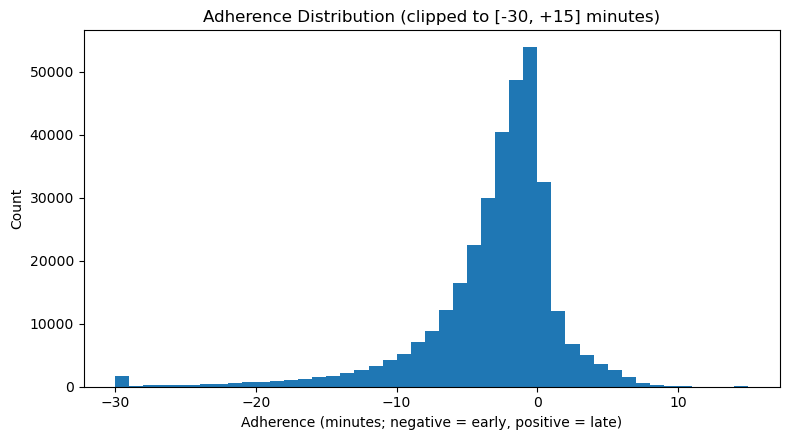

In [18]:
# Q1 — Overall OTP & Adherence Distribution (using canonical aliases)
# - What: Summarize on-time performance (OTP) and visualize the distribution of adherence.
# - Why: Establish a clear baseline of reliability and whether skew is driven by early or late departures.
# - How: Compute mean of DF_OTP['is_ontime']; show descriptive stats for ADHERENCE; plot a clipped histogram for readability.

import numpy as np
import pandas as pd
import math

# ---------- Helpers ----------
def _fmt_pct(x):
    return "n/a" if (x is None or pd.isna(x)) else f"{x:.1%}"

def _wilson_ci(k, n, z=1.96):
    """Wilson score interval for a proportion. Returns (p_hat, lo, hi) or (nan, nan, nan) if n=0."""
    if n == 0:
        return (np.nan, np.nan, np.nan)
    p = k / n
    denom = 1 + (z**2)/n
    center = (p + (z**2)/(2*n)) / denom
    margin = (z * math.sqrt((p*(1-p)/n) + (z**2)/(4*n*n))) / denom
    return (p, center - margin, center + margin)

def _describe_series(s: pd.Series):
    """Robust 1-line stats dict for a numeric series."""
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return {"count": 0, "mean": "n/a", "std": "n/a", "median": "n/a",
                "p10": "n/a", "p90": "n/a", "min": "n/a", "max": "n/a"}
    return {
        "count": int(s.size),
        "mean": round(s.mean(), 2),
        "std": round(s.std(ddof=1), 2),
        "median": round(s.median(), 2),
        "p10": round(s.quantile(0.10), 2),
        "p90": round(s.quantile(0.90), 2),
        "min": round(s.min(), 2),
        "max": round(s.max(), 2),
    }

# ---------- OTP metrics ----------
if 'DF_OTP' not in globals() or DF_OTP.empty:
    print("DF_OTP is not available or empty—run Step 0 first.")
else:
    # Overall OTP
    if "is_ontime" in DF_OTP.columns:
        k = int(pd.to_numeric(DF_OTP["is_ontime"], errors="coerce").fillna(0).sum())
        n = int(DF_OTP["is_ontime"].shape[0])
        p_hat, lo, hi = _wilson_ci(k, n)
        print("Overall OTP (policy-aligned):")
        print(f"  OTP = {_fmt_pct(p_hat)}  |  95% CI [{_fmt_pct(lo)}, {_fmt_pct(hi)}]  |  n = {n:,}\n")
    else:
        print("Column 'is_ontime' not found in DF_OTP.\n")

    # Early vs Late vs On-time mix (optional but helpful context)
    if "otp_label" in DF_OTP.columns:
        mix = (DF_OTP["otp_label"]
               .value_counts(dropna=False)
               .reindex(["On-time","Late","Early","Unclassified"])
               .fillna(0).astype(int))
        mix_pct = (mix / mix.sum()).map(lambda x: f"{x:.1%}" if mix.sum() else "n/a")
        out = pd.DataFrame({"count": mix, "share": mix_pct})
        print("Arrival/Departure classification mix:")
        print(out.to_string())
        print()

    # ---------- Adherence distribution ----------
    # Use the clipped helper if present; otherwise compute a clipped view on the fly.
    has_adh = "ADHERENCE" in DF_OTP.columns
    has_clip = "ADHERENCE_clip" in DF_OTP.columns

    if has_adh or has_clip:
        adh_src = "ADHERENCE_clip" if has_clip else "ADHERENCE"
        adh = pd.to_numeric(DF_OTP[adh_src], errors="coerce")
        stats_all = _describe_series(DF_OTP.get("ADHERENCE", pd.Series(dtype=float)))
        stats_clip = _describe_series(adh)

        print("Adherence (minutes) — descriptive stats")
        print("  Raw   :", stats_all)
        print("  Clipped ([-30, +15] for readability):", stats_clip)

        # Plot: histogram of clipped adherence
        try:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(8, 4.5))
            adh.dropna().plot(kind="hist", bins=45)
            plt.title("Adherence Distribution (clipped to [-30, +15] minutes)")
            plt.xlabel("Adherence (minutes; negative = early, positive = late)")
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"(Plot skipped — {e})")
    else:
        print("No ADHERENCE columns found; skipping adherence stats and plot.")


### 2) How does direction of travel, route, or location affect the on-time performance?

Top 10 Routes by OTP (policy-aligned):


,ROUTE_ABBR,route_name,otp,n
0,22,Bordeaux,89.3%,23960
1,23,Dickerson Pike,89.0%,39334
2,50,Charlotte Pike,85.7%,42557
3,56,Gallatin Pike,82.3%,58716
4,7,Hillsboro,78.0%,17000
5,52,Nolensville Pike,76.7%,49170
6,3,West End,76.1%,45099
7,55,Murfreesboro Pike,70.0%,60157


Bottom 10 Routes by OTP:


,ROUTE_ABBR,route_name,otp,n
0,55,Murfreesboro Pike,70.0%,60157
1,3,West End,76.1%,45099
2,52,Nolensville Pike,76.7%,49170
3,7,Hillsboro,78.0%,17000
4,56,Gallatin Pike,82.3%,58716
5,50,Charlotte Pike,85.7%,42557
6,23,Dickerson Pike,89.0%,39334
7,22,Bordeaux,89.3%,23960


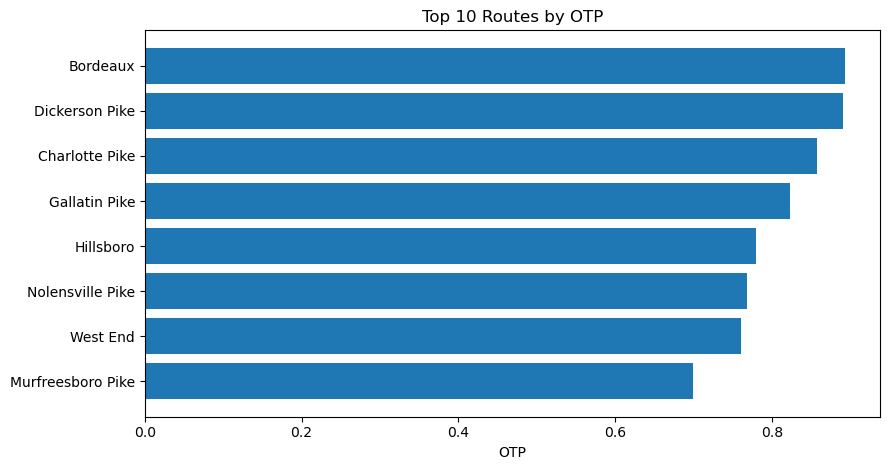


Directional Asymmetry (route × direction):


C:\Users\joede\AppData\Local\Temp\ipykernel_30696\1880832362.py:107: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = by_rdir.pivot_table(index=["ROUTE_ABBR","route_name"],


,ROUTE_ABBR,route_name,dir_asym,n_total
0,52,Nolensville Pike,16.1%,49170
1,3,West End,15.7%,45099
2,56,Gallatin Pike,12.3%,58716
3,7,Hillsboro,10.6%,17000
4,55,Murfreesboro Pike,10.6%,60157
5,22,Bordeaux,8.3%,23960
6,23,Dickerson Pike,3.9%,39334
7,50,Charlotte Pike,2.4%,42557



Downtown vs Non-Downtown (heuristic split):


,bucket,otp,n
0,Non-downtown,78.5%,265739
1,Downtown timepoints,85.4%,70254



Timepoint hotspots — highest late_rate (n ≥ 50):


,ROUTE_ABBR,route_name,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,timepoint_name,late_rate,n
0,22,Bordeaux,FROM DOWNTOWN,YGKG,CLARKSVILLE PIKE & ABERNATHY RD SB,48.0%,820
1,55,Murfreesboro Pike,FROM DOWNTOWN,MXBELL,BELL STATION OUTBOUND,46.6%,4951
2,52,Nolensville Pike,FROM DOWNTOWN,DCSCC,EZELL PIKE CONVENIENCE CTR WB,43.4%,1578
3,3,West End,FROM DOWNTOWN,WHBG,WHITE BRIDGE PIKE & CHARLOTTE SHONE,41.3%,2139
4,52,Nolensville Pike,FROM DOWNTOWN,HDANT,HARDING PL & ANTIOCH PK WB,39.6%,1988
5,55,Murfreesboro Pike,FROM DOWNTOWN,HHWM,HICKORY HOLLOW PL & HICKORY HOLLOW,35.6%,4936
6,55,Murfreesboro Pike,FROM DOWNTOWN,MXDONEL,DONELSON/DELL STATION OUTBOUND,35.5%,4956
7,3,West End,FROM DOWNTOWN,BRCJ,COLICE JEANNE RD & BAUGH RD SB,34.9%,2031
8,3,West End,FROM DOWNTOWN,HRWB,HARDING PIKE & BOSLEY SPRINGS RD WB,34.4%,4119
9,55,Murfreesboro Pike,TO DOWNTOWN,MXWHARF,WHARF STATION INBOUND,32.2%,5136


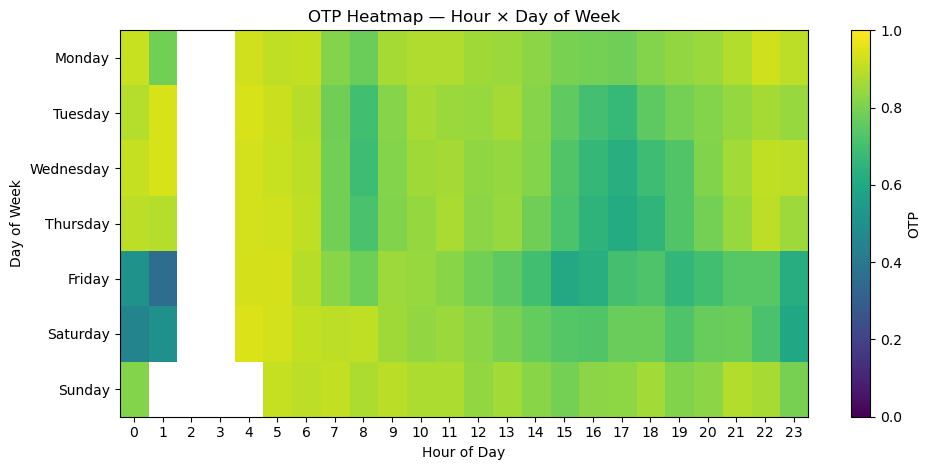

In [19]:
# Q2 — Effects of Direction, Route, and Location (using canonical aliases)
# - What: Compare OTP by route, direction, and timepoint; include a Downtown split and visuals.
# - Why: Identify corridors/timepoints driving performance and reveal directional asymmetry.
# - How: Use DF_OTP/BY_ROUTE/TP_HOT to compute tables with counts (n) and charts (Top 10 Routes, Hour×Day OTP heatmap).
# - Supports: Q2 (and informs Q9).

import numpy as np
import pandas as pd
from IPython.display import display

# ---------- helpers ----------
def _ensure(df: pd.DataFrame, cols):
    return all(c in df.columns for c in cols)

def _dow_ordered_cats(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _style_pct(df: pd.DataFrame, cols):
    """Return a Styler with percentage formatting for cols (if present)."""
    fmt = {c: "{:.1%}" for c in cols if c in df.columns}
    return df.style.format(fmt)

# ---------- availability check ----------
if 'DF_OTP' not in globals() or DF_OTP.empty:
    print("DF_OTP is not available or empty—run Step 0 first.")
else:
    # =========================
    # A) OTP by Route (Top / Bottom)
    # =========================
    if 'BY_ROUTE' in globals() and isinstance(BY_ROUTE, pd.DataFrame) and not BY_ROUTE.empty and _ensure(BY_ROUTE, ["ROUTE_ABBR","otp","n"]):
        by_route = BY_ROUTE.copy()
        # Attach route_name if missing
        if "route_name" not in by_route.columns and "route_name" in DF_OTP.columns:
            rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
            by_route["route_name"] = rn_map.reindex(by_route["ROUTE_ABBR"]).values
    else:
        # Rebuild safely from DF_OTP
        if _ensure(DF_OTP, ["ROUTE_ABBR","is_ontime"]):
            by_route = (DF_OTP.groupby("ROUTE_ABBR", as_index=False)
                               .agg(otp=("is_ontime","mean"), n=("is_ontime","size")))
            if "route_name" in DF_OTP.columns:
                rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
                by_route["route_name"] = rn_map.reindex(by_route["ROUTE_ABBR"]).values
            else:
                by_route["route_name"] = by_route["ROUTE_ABBR"].astype(str)
        else:
            by_route = pd.DataFrame(columns=["ROUTE_ABBR","route_name","otp","n"])

    if not by_route.empty:
        # Top 10: otp desc, then n desc
        top10 = (
            by_route.sort_values(["otp","n"], ascending=[False, False])
                    .loc[:, ["ROUTE_ABBR","route_name","otp","n"]]
                    .head(10)
                    .reset_index(drop=True)
        )
        # Bottom 10: otp asc, then n desc
        bottom10 = (
            by_route.sort_values(["otp","n"], ascending=[True, False])
                    .loc[:, ["ROUTE_ABBR","route_name","otp","n"]]
                    .head(10)
                    .reset_index(drop=True)
        )

        print("Top 10 Routes by OTP (policy-aligned):")
        display(_style_pct(top10, ["otp"]))
        print("Bottom 10 Routes by OTP:")
        display(_style_pct(bottom10, ["otp"]))
    else:
        print("No route-level data available.")

    # ---------- Visual: Top 10 Routes bar ----------
    try:
        import matplotlib.pyplot as plt
        if not by_route.empty:
            plot_top = (by_route.sort_values(["otp","n"], ascending=[False, False])
                                .head(10)
                                .copy())
            plt.figure(figsize=(9, 4.8))
            plt.barh(plot_top["route_name"].astype(str), plot_top["otp"])
            plt.gca().invert_yaxis()
            plt.xlabel("OTP")
            plt.title("Top 10 Routes by OTP")
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"(Top 10 Routes plot skipped — {e})")

    # =========================
    # B) Directional Asymmetry — OTP by route × direction
    # =========================
    print("\nDirectional Asymmetry (route × direction):")
    if _ensure(DF_OTP, ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","is_ontime"]):
        by_rdir = (DF_OTP.groupby(["ROUTE_ABBR","ROUTE_DIRECTION_NAME"], observed=True)["is_ontime"]
                          .agg(["mean","size"]).reset_index()
                          .rename(columns={"mean":"otp","size":"n"}))

        # Attach route_name if available
        if "route_name" in DF_OTP.columns:
            rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
            by_rdir["route_name"] = by_rdir["ROUTE_ABBR"].map(rn_map).fillna(by_rdir["ROUTE_ABBR"].astype(str))
        else:
            by_rdir["route_name"] = by_rdir["ROUTE_ABBR"].astype(str)

        # Asymmetry per route
        pivot = by_rdir.pivot_table(index=["ROUTE_ABBR","route_name"],
                                    columns="ROUTE_DIRECTION_NAME",
                                    values="otp")
        pivot["dir_asym"] = pivot.max(axis=1) - pivot.min(axis=1)
        n_per = by_rdir.groupby(["ROUTE_ABBR","route_name"])["n"].sum()

        asym = (pivot[["dir_asym"]]
                .join(n_per)
                .reset_index()
                .sort_values(["dir_asym","n"], ascending=[False, False])
                .rename(columns={"n":"n_total"})
                .reset_index(drop=True))
        display(_style_pct(asym, ["dir_asym"]))
    else:
        print("Missing columns for route×direction breakdown.")

    # =========================
    # C) Downtown vs Non-Downtown split (heuristic)
    # =========================
    print("\nDowntown vs Non-Downtown (heuristic split):")
    if ("is_ontime" in DF_OTP.columns) and (("timepoint_name" in DF_OTP.columns) or ("TIME_POINT_ABBR" in DF_OTP.columns)):
        name_col = "timepoint_name" if "timepoint_name" in DF_OTP.columns else "TIME_POINT_ABBR"
        names = DF_OTP[name_col].astype(str).str.upper()
        downtown_mask = names.str.contains(r"DOWNTOWN|CENTRAL|MUSIC CITY|MCC|DCS|TRANSIT CENTER")
        split = (DF_OTP.assign(is_downtown=downtown_mask)
                        .groupby("is_downtown")["is_ontime"]
                        .agg(["mean","size"]).reset_index()
                        .rename(columns={"mean":"otp","size":"n"}))
        split["bucket"] = split["is_downtown"].map({True:"Downtown timepoints", False:"Non-downtown"})
        split = split.loc[:, ["bucket","otp","n"]]
        display(_style_pct(split, ["otp"]))
    else:
        print("No timepoint labels found to create a Downtown split.")

    # =========================
    # D) Timepoint Hotspots (worst lateness, min n threshold)
    # =========================
    thr = 50  # tweak for stability
    print(f"\nTimepoint hotspots — highest late_rate (n ≥ {thr}):")
    if 'TP_HOT' in globals() and isinstance(TP_HOT, pd.DataFrame) and not TP_HOT.empty and _ensure(TP_HOT, ["late_rate","n"]):
        hot = TP_HOT.loc[TP_HOT["n"] >= thr].copy()
        hot = hot.sort_values(["late_rate","n"], ascending=[False, False]).head(15).reset_index(drop=True)
        cols = [c for c in ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","late_rate","n"] if c in hot.columns]
        display(_style_pct(hot.loc[:, cols], ["late_rate"]))
    else:
        print("TP_HOT table not available; run Step 0 or relax the threshold if the sample is small.")

# =========================
# E) Visual: Hour × Day OTP heatmap (show missing hours as white)
# =========================
if _ensure(DF_OTP, ["hour","dow","is_ontime"]):
    tmp = DF_OTP.loc[:, ["hour","dow","is_ontime"]].dropna().copy()
    tmp["hour"] = pd.to_numeric(tmp["hour"], errors="coerce")
    tmp = tmp[tmp["hour"].between(0, 23)]  # guard weird values
    tmp["dow"] = _dow_ordered_cats(tmp["dow"])

    # Build a complete 7×24 grid, so hours with no data (e.g., 2–3 AM) appear as NaN
    hours_full = list(range(24))
    grid = (tmp.groupby(["dow","hour"], observed=True)["is_ontime"]
               .mean()
               .unstack("hour")
               .reindex(columns=hours_full)   # <-- ensures 0..23 columns exist
               .sort_index())

    try:
        import matplotlib.pyplot as plt
        import numpy as np

        plt.figure(figsize=(10, 4.8))
        # make a copy of the colormap and map NaNs (bad values) to white
        cmap = plt.cm.viridis.copy()
        cmap.set_bad('white')

        arr = grid.to_numpy()
        im = plt.imshow(arr, aspect="auto", interpolation="nearest",
                        vmin=0, vmax=1, cmap=cmap)  # fixed scale 0..1

        plt.title("OTP Heatmap — Hour × Day of Week")
        plt.xlabel("Hour of Day")
        plt.ylabel("Day of Week")

        # ticks
        plt.xticks(range(len(hours_full)), hours_full, rotation=0)
        days = list(grid.index.astype(str))
        plt.yticks(range(len(days)), days)

        cb = plt.colorbar(im)
        cb.set_label("OTP")

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(Heatmap skipped — {e})")
else:
    print("Missing hour/dow/is_ontime for heatmap.")




### 3) How does time of day or day of week affect on-time performance?

OTP by Day of Week (Mon→Sun):


,dow,otp,n
0,Monday,84.3%,47686
1,Tuesday,80.4%,56481
2,Wednesday,79.3%,56633
3,Thursday,78.6%,55868
4,Friday,75.3%,55388
5,Saturday,79.3%,35888
6,Sunday,85.5%,28049


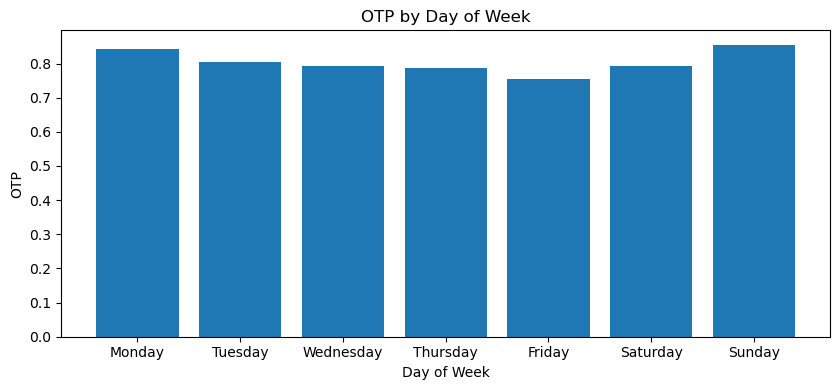

OTP by Hour of Day:


,hour,otp
0,0,75.7%
1,1,71.2%
2,2,nan%
3,3,nan%
4,4,93.5%
5,5,92.2%
6,6,89.9%
7,7,81.5%
8,8,75.7%
9,9,83.9%


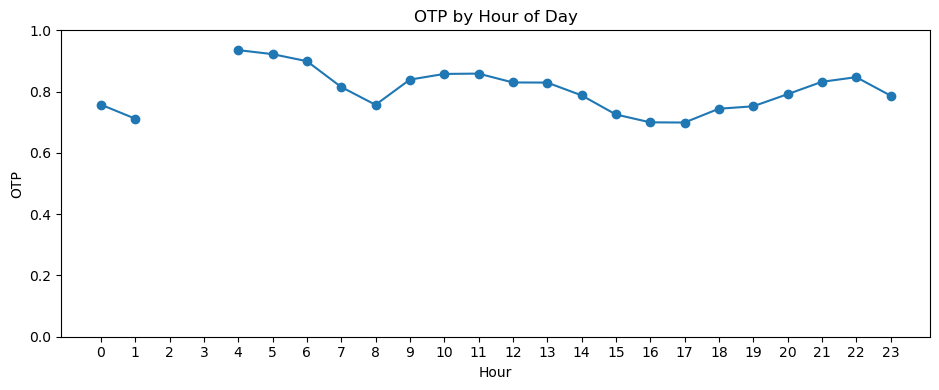

Peak vs Off-peak OTP:


,peak,otp,n
0,Peak,75.9%,121691
1,Off-peak,82.3%,214302


In [20]:
# Q3 — Time of Day / Day of Week (using canonical aliases)
# - What: Compare OTP by hour, peak window, and day-of-week (ordered Mon→Sun).
# - Why: Reveal rush-hour and weekday/weekend patterns to inform scheduling and staffing.
# - How: Groupby DF_OTP for means; ordered bar chart for DOW; line chart for hour; include peak vs off-peak table with counts.

import numpy as np
import pandas as pd
from IPython.display import display

# ---------- helpers ----------
def _ensure(df: pd.DataFrame, cols):
    return all(c in df.columns for c in cols)

def _dow_ordered(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _style_pct(df: pd.DataFrame, pct_cols):
    return df.style.format({c: "{:.1%}" for c in pct_cols if c in df.columns})

# ---------- availability check ----------
need_cols = ["is_ontime", "hour", "dow"]
if 'DF_OTP' not in globals() or DF_OTP.empty or not _ensure(DF_OTP, need_cols):
    print("DF_OTP missing or lacks required columns (is_ontime, hour, dow). Run Step 0 first.")
else:
    # Build a clean working slice
    cols = ["is_ontime","hour","dow"]
    if "peak" in DF_OTP.columns: cols.append("peak")
    dfx = DF_OTP.loc[:, cols].copy()

    # Normalize inputs
    dfx["hour"] = pd.to_numeric(dfx["hour"], errors="coerce")
    dfx = dfx[dfx["hour"].between(0, 23)]
    dfx["dow"] = _dow_ordered(dfx["dow"])

    # Ensure peak label exists (recreate if absent)
    if "peak" not in dfx.columns:
        PEAK_AM = (7, 9)
        PEAK_PM = (16, 18)
        dfx["peak"] = np.where(
            dfx["hour"].between(*PEAK_AM) | dfx["hour"].between(*PEAK_PM),
            "Peak", "Off-peak"
        )

    # =========================
    # A) OTP by Day of Week (ordered Mon→Sun)
    # =========================
    by_dow = (dfx.groupby("dow", observed=True)["is_ontime"]
                 .agg(otp="mean", n="size")
                 .reset_index()
                 .rename(columns={"is_ontime":"otp"}))
    # Present as DataFrame with percent formatting
    print("OTP by Day of Week (Mon→Sun):")
    display(_style_pct(by_dow, ["otp"]))

    # Visual: ordered Mon→Sun bar
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8.5, 4.0))
        plt.bar(by_dow["dow"].astype(str), by_dow["otp"])
        plt.title("OTP by Day of Week")
        plt.xlabel("Day of Week")
        plt.ylabel("OTP")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(DOW bar chart skipped — {e})")

    # =========================
    # B) OTP by Hour of Day (0–23)
    # =========================
    hours_full = list(range(24))
    by_hour = (dfx.groupby("hour", observed=True)["is_ontime"]
                  .mean()
                  .reindex(hours_full)        # show all hours, even if missing (NaN)
                  .reset_index()
                  .rename(columns={"is_ontime":"otp"}))
    print("OTP by Hour of Day:")
    display(_style_pct(by_hour, ["otp"]))

    # Visual: hourly line
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(9.5, 4.0))
        plt.plot(by_hour["hour"], by_hour["otp"], marker="o")
        plt.title("OTP by Hour of Day")
        plt.xlabel("Hour")
        plt.ylabel("OTP")
        plt.xticks(hours_full)
        plt.ylim(0, 1)  # keeps scale interpretable across datasets
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(Hourly line plot skipped — {e})")

    # =========================
    # C) Peak vs Off-peak table (with counts)
    # =========================
    by_peak = (dfx.groupby("peak", observed=True)["is_ontime"]
                  .agg(otp="mean", n="size")
                  .reset_index())
    # Sort Peak first for readability
    by_peak["peak"] = pd.Categorical(by_peak["peak"], categories=["Peak","Off-peak"], ordered=True)
    by_peak = by_peak.sort_values("peak").reset_index(drop=True)
    print("Peak vs Off-peak OTP:")
    display(_style_pct(by_peak, ["otp"]))


### 4) How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

Saved: ..\data\figures\best10_operators_adjusted_effect.png
Saved: ..\data\figures\worst10_operators_adjusted_effect.png



### What these charts show (in plain English)

- **Each bar is a driver** (we show a friendly alias instead of their ID).
- The bar measures the driver’s **adjusted effect on on-time performance**, in **percentage points (pp)**.
- *Adjusted* means we’ve already accounted for the route and direction they were on, the **day of week**, and the **hour of day**.
  - In other words, we **compare drivers to what would be expected** given their assignments and time-of-day mix.
- **Positive bars** (to the right) mean the driver’s trips were **more on-time than expected**;  
  **negative bars** mean **less on-time than expected**.

**How to interpret:**
- A bar of **+2.5 pp** means this driver’s trips were, on average, **2.5 percentage points more on-time** than we’d expect for the same routes, directions, days, and hours.
- We **only include drivers with at least 200 trips** (or stops) in the analysis to avoid noisy small samples.
- This does **not prove causation**. It isolates a **driver-attributable signal** after controlling for assignment/time patterns, but other unobserved factors may remain.

**What you can do with this:**
- For improvement: look at **common practices** among the top group (e.g., departure discipline at early stops, recovery time habits).
- For coaching: the bottom group indicates where **targeted feedback or schedule support** might have impact.


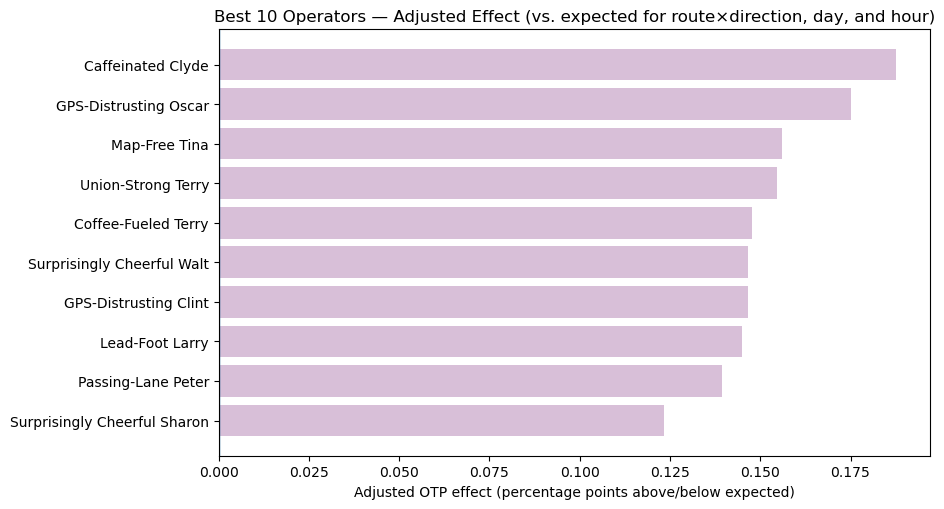

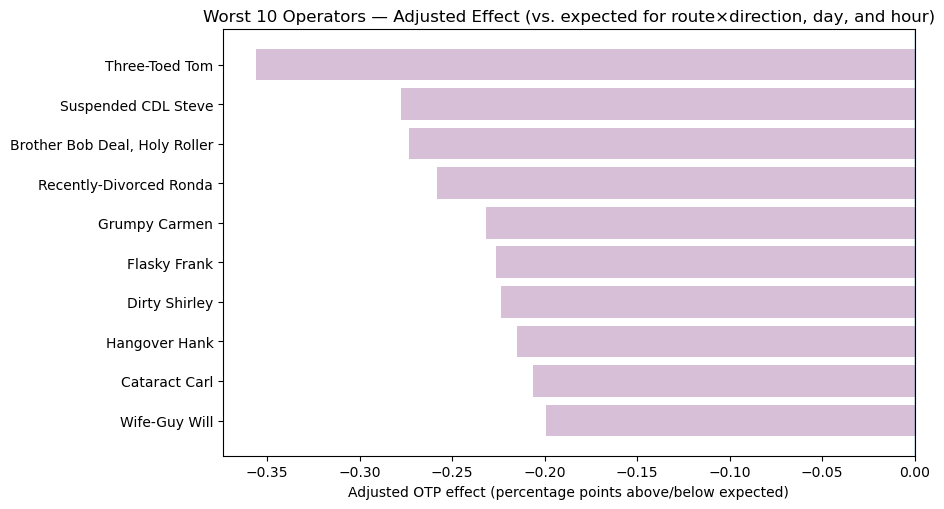

In [21]:
# Q4 — Stakeholder Graphics (no bar labels) with custom operator_id→name mapping

import pandas as pd, numpy as np
from pathlib import Path
from IPython.display import display, Markdown

# -------- custom operator name map (from user) --------
operator_name_map = {
    56:'Grumpy Marv',235:'Chatty Dottie',244:'No-Nonsense Earl',301:'Sleep-Deprived Sharon',
    304:'Overcaffeinated Gus',326:'Union Skeptic Clint',329:'Union Scab Darla',332:'Chronically Late Ralph',
    341:'Surprisingly Cheerful Nancy',357:'Suspended CDL Steve',359:'Seatbelt-Optional Carmen',
    375:'Horn-Happy Ed',379:'High-Visibility Tina',409:'Thermos-Powered Stan',414:'Veteran Lois',
    465:'Coffee-Fueled Jerry',471:'Early-Shift Tamika',517:'Map-Free Doug',520:'Snack-Driven Velma',
    522:'Cautiously Optimistic Clarence',559:'GPS-Distrusting Paula',572:'Radio-DJ Chuck',611:'Zen-Like Mabel',
    624:'Pothole-Detecting Rita',653:'Safety-Vesting Phil',656:'Grumpy Terry',659:'Chatty Janelle',
    723:'Passing-Lane Peter',778:'Sleep-Deprived Walt',785:'Overcaffeinated Cheryl',907:'Scab Ron',
    1016:'Mildly Annoyed Debbie',1040:'Regional Regina',1052:'Surprisingly Cheerful Randy',
    1078:'Weathered Nadine',1133:'Seatbelt-Optional Oscar',1147:'Horn-Happy Gladys',1170:'High-Visibility Dean',
    1175:'Thermos-Powered Clyde',1177:'Veteran Anita',1190:'Coffee-Fueled Marv',1198:'Early-Shift Dottie',
    1202:'Map-Free Earl',1204:'Snack-Driven Sharon',1206:'Cautiously Optimistic Gus',1208:'GPS-Distrusting Clint',
    1222:'Radio-DJ Darla',1237:'Zen-Like Ralph',1251:'Pothole-Detecting Nancy',1266:'Safety-Vesting Frank',
    1277:'Grumpy Carmen',1305:'Chatty Ed',1330:'No-Nonsense Tina',1343:'Sleep-Deprived Stan',
    1352:'Overcaffeinated Lois',1359:'Union-Strong Jerry',1361:'Mildly Annoyed Tamika',1362:'Chronically Late Doug',
    1363:'Surprisingly Cheerful Velma',1368:'Weathered Clarence',1372:'Seatbelt-Optional Paula',
    1379:'Horn-Happy Chuck',1389:'High-Visibility Mabel',1391:'Thermos-Powered Rita',1394:'Four-Eyed Willie',
    1401:'Coffee-Fueled Terry',1406:'Early-Shift Janelle',1410:'Map-Free Hector',1419:'Snack-Driven Walt',
    1457:'Cautiously Optimistic Cheryl',1489:'GPS-Distrusting Ron',1500:'Radio-DJ Debbie',1505:'Zen-Like Regina',
    1524:'Pothole-Detecting Randy',1542:'Safety-Vesting Nadine',1566:'Grumpy Oscar',1582:'Chatty Gladys',
    1590:'No-Nonsense Dean',1593:'Sleep-Deprived Clyde',1596:'Overcaffeinated Anita',1597:'Marv',
    1598:'Mildly Annoyed Dottie',1601:'Chronically Late Earl',1603:'Surprisingly Cheerful Sharon',
    1606:'Weathered Gus',1617:'Seatbelt-Optional Clint',1619:'Horn-Happy Darla',1621:'High-Visibility Ralph',
    1623:'Thermos-Powered Nancy',1650:'Veteran Frank',1673:'Coffee-Fueled Carmen',1682:'Early-Shift Ed',
    1703:'Map-Free Tina',1705:'Snack-Driven Stan',1706:'Cautiously Optimistic Lois',1713:'GPS-Distrusting Jerry',
    1716:'Radio-DJ Tamika',1717:'Zen-Like Doug',1730:'Pothole-Detecting Velma',1736:'Safety-Vesting Clarence',
    1742:'Grumpy Paula',1743:'Chatty Chuck',1761:'No-Nonsense Mabel',1762:'Sleep-Deprived Rita',
    1763:'Overcaffeinated Phil',1780:'Union-Strong Terry',1782:'Mildly Annoyed Janelle',
    1788:'Chronically Late Hector',1792:'Surprisingly Cheerful Walt',1797:'Weathered Cheryl',1800:'Flasky Frank',
    1814:'Horn-Happy Debbie',1815:'High-Visibility Regina',1823:'Thermos-Powered Randy',1824:'Veteran Nadine',
    1838:'Coffee-Fueled Oscar',1842:'Early-Shift Gladys',1845:'Map-Free Dean',1848:'Snack-Driven Clyde',
    1865:'Cautiously Optimistic Anita',1866:'GPS-Distrusting Marv',1867:'Radio-DJ Dottie',1880:'Zen-Like Earl',
    1889:'Pothole-Detecting Sharon',1892:'Safety-Vesting Gus',1893:'Grumpy Clint',1904:'Three-Toed Tom',
    1914:'No-Nonsense Ralph',1915:'Sleep-Deprived Nancy',1922:'Overcaffeinated Frank',1927:'Union-Strong Carmen',
    1938:'Mildly Annoyed Ed',1948:'Chronically Late Tina',1958:'Surprisingly Cheerful Stan',1984:'Weathered Lois',
    1992:'Seatbelt-Optional Jerry',1997:'Horn-Happy Tamika',2001:'High-Visibility Doug',2012:'Thermos-Powered Velma',
    2029:'Veteran Clarence',2033:'Coffee-Fueled Paula',2040:'Early-Shift Chuck',2041:'Map-Free Mabel',
    2053:'Snack-Driven Rita',2055:'Cautiously Optimistic Phil',2059:'GPS-Distrusting Terry',
    2062:'Radio-DJ Janelle',2082:'Zen-Like Hector',2088:'Pothole-Detecting Walt',2094:'Safety-Vesting Cheryl',
    2102:'Grumpy Ron',2103:'Chatty Debbie',2109:'No-Nonsense Regina',2112:'Sleep-Deprived Randy',
    2125:'Overcaffeinated Nadine',2126:'Union-Strong Oscar',2127:'Mildly Annoyed Gladys',2137:'Chronically Late Dean',
    2138:'Surprisingly Cheerful Clyde',2151:'Weathered Anita',2161:'Seatbelt-Optional Marv',2164:'Horn-Happy Dottie',
    2177:'High-Visibility Earl',2178:'Thermos-Powered Sharon',2200:'Lead-Foot Larry',2207:'Coffee-Fueled Clint',
    2217:'Early-Shift Darla',2221:'Map-Free Ralph',2228:'Snack-Driven Nancy',2230:'Cautiously Optimistic Frank',
    2246:'GPS-Distrusting Carmen',2253:'Radio-DJ Ed',2254:'Zen-Like Tina',2256:'Silent Stan',
    2294:'Safety-Vesting Lois',2306:'Grumpy Jerry',2309:'Chatty Tamika',2312:'Recently-Divorced Ronda',
    2313:'Sleep-Deprived Velma',2321:'Overcaffeinated Clarence',2322:'Union-Strong Paula',
    2324:'Mildly Annoyed Chuck',2332:'Chronically Late Mabel',2335:'Surprisingly Cheerful Rita',
    2338:'Weathered Phil',2348:'Seatbelt-Optional Terry',2352:'Horn-Happy Janelle',2355:'High-Visibility Hector',
    2356:'Thermos-Powered Walt',2357:'Veteran Cheryl',2362:'Coffee-Fueled Ron',2368:'Early-Shift Debbie',
    2371:'Map-Free Regina',2374:'Snack-Driven Randy',2377:'Cautiously Optimistic Nadine',2399:'GPS-Distrusting Oscar',
    2400:'Radio-DJ Gladys',2424:'Zen-Like Dean',2427:'Pothole-Detecting Clyde',2428:'Safety-Vesting Anita',
    2432:'Grumpy Marv',2440:'Chatty Dottie',2441:'No-Nonsense Earl',2448:'Sleep-Deprived Sharon',
    2458:'Overcaffeinated Gus',2459:'Union-Strong Clint',2464:'Mildly Annoyed Darla',2472:'Chronically Late Ralph',
    2479:'Surprisingly Cheerful Nancy',2493:'Weathered Frank',2494:'Seatbelt-Optional Carmen',2497:'Horn-Happy Ed',
    2500:'High-Visibility Tina',2503:'Thermos-Powered Stan',2505:'Veteran Lois',2512:'Coffee-Fueled Jerry',
    2529:'Early-Shift Tamika',2530:'Map-Free Doug',2531:'Snack-Driven Velma',2534:'Cautiously Optimistic Clarence',
    2545:'GPS-Distrusting Paula',2546:'Radio-DJ Chuck',2547:'Zen-Like Mabel',2549:'Pothole-Detecting Rita',
    2560:'Safety-Vesting Phil',2563:'Grumpy Terry',2567:'Chatty Janelle',2569:'No-Nonsense Hector',
    2573:'Off-Road Orwell',2577:'Overcaffeinated Cheryl',2580:'Union-Strong Ron',2584:'Mildly Annoyed Debbie',
    2585:'Bumper-Car Bart',2586:'Surprisingly Cheerful Randy',2590:'Weathered Nadine',2594:'Seatbelt-Optional Oscar',
    2600:'Horn-Happy Gladys',2603:'High-Visibility Dean',2610:'Caffeinated Clyde',2618:'Veteran Anita',
    2623:'Coffee-Fueled Marv',2624:'Early-Shift Dottie',2629:'Map-Free Earl',2630:'Snack-Driven Sharon',
    2638:'Cautiously Optimistic Gus',2639:'GPS-Distrusting Clint',2642:'Radio-DJ Darla',2646:'Zen-Like Ralph',
    2649:'Pothole-Detecting Nancy',2662:'Safety-Vesting Frank',2669:'Grumpy Carmen',2675:'Chatty Ed',
    2689:'No-Nonsense Tina',2693:'Sleep-Deprived Stan',2694:'Overcaffeinated Lois',2697:'Union-Strong Jerry',
    2703:'Mildly Annoyed Tamika',2706:'Chronically Late Doug',2714:'Surprisingly Cheerful Velma',
    2733:'Weathered Clarence',2747:'Seatbelt-Optional Paula',2751:'Horn-Happy Chuck',2752:'High-Visibility Mabel',
    2760:'Thermos-Powered Rita',2762:'Veteran Phil',2764:'Coffee-Fueled Terry',2765:'Early-Shift Janelle',
    2779:'Map-Free Hector',2780:'Snack-Driven Walt',2783:'Hangover Hank',2784:'GPS-Distrusting Ron',
    2792:'Radio-DJ Debbie',2793:'Zen-Like Regina',2809:'Pothole-Detecting Randy',2817:'Safety-Vesting Nadine',
    2821:'Grumpy Oscar',2832:'Chatty Gladys',2876:'No-Nonsense Dean',2943:'Sleep-Deprived Clyde',
    2954:'Overcaffeinated Anita',2958:'Union-Strong Marv',2962:'Mildly Annoyed Dottie',2963:'Chronically Late Earl',
    2967:'Surprisingly Cheerful Sharon',2969:'Weathered Gus',2972:'Seatbelt-Optional Clint',2976:'Horn-Happy Darla',
    2978:'High-Visibility Ralph',2982:'Thermos-Powered Nancy',2987:'Veteran Frank',2989:'Coffee-Fueled Carmen',
    2990:'Early-Shift Ed',3001:'Map-Free Tina',3012:'Snack-Driven Stan',3013:'Cautiously Optimistic Lois',
    3015:'GPS-Distrusting Jerry',3016:'Radio-DJ Tamika',3020:'Zen-Like Doug',3027:'Pothole-Detecting Velma',
    3031:'Safety-Vesting Clarence',3035:'Grumpy Paula',3064:'Chatty Chuck',3077:'No-Nonsense Mabel',
    3079:'Sleep-Deprived Rita',3087:'Overcaffeinated Phil',3088:'Union-Strong Terry',3090:'Mildly Annoyed Janelle',
    3093:'Chronically Late Hector',3096:'Wife-Guy Will',3098:'Dirty Shirley',3099:'Seatbelt-Optional Ron',
    3100:'Horn-Happy Debbie',3101:'Cataract Carl',3102:'Thermos-Powered Randy',3103:'Veteran Nadine',
    3116:'Coffee-Fueled Oscar',3118:'Early-Shift Gladys',3120:'Brother Bob Deal, Holy Roller',
    3122:'Snack-Driven Clyde',3124:'Cautiously Optimistic Anita',3126:'GPS-Distrusting Marv',
    3127:'Radio-DJ Dottie',3128:'Zen-Like Earl',3129:'Pothole-Detecting Sharon',3134:'Safety-Vesting Gus',
    3138:'Grumpy Clint',3140:'Chatty Darla',3142:'No-Nonsense Ralph',3144:'Sleep-Deprived Nancy',
    3149:'Overcaffeinated Frank',3156:'Union-Strong Carmen',3165:'Mildly Annoyed Ed',3166:'Chronically Late Tina',
    3173:'Surprisingly Cheerful Stan'
}

# -------- helpers --------
def _ensure(df, cols): return all(c in df.columns for c in cols)

def _find_operator_col(df):
    exact = [c for c in df.columns if c.upper() in {"OPERATOR","OPERATOR_ID","OPERATOR_ABBR"}]
    if exact: return exact[0]
    fuzzy = [c for c in df.columns if c.upper().startswith("OPERATOR")]
    return fuzzy[0] if fuzzy else None

def _dow_order(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _humanize(series):
    import hashlib
    first = ["Alex","Taylor","Jordan","Casey","Morgan","Riley","Avery","Quinn","Sam","Jamie",
             "Cameron","Drew","Parker","Reese","Rowan","Logan","Emerson","Blake","Elliot","Hayden"]
    last  = ["Brooks","Carter","Hayes","Jensen","Kelly","Lane","Morris","Parker","Reed","Shaw",
             "Bailey","Cooper","Foster","Harper","Hughes","Kennedy","Marshall","Miller","Morgan","Spencer"]
    out = {}
    for k in series.dropna().astype(str).unique():
        h = int(hashlib.md5(k.encode()).hexdigest(), 16)
        out[k] = f"{first[h % len(first)]} {last[(h//97) % len(last)]}"
    return series.astype(str).map(out)

def _apply_name_map(op_series: pd.Series, name_map: dict):
    # Try numeric lookup first (int keys), fallback to hash-based names for missing
    op_num = pd.to_numeric(op_series, errors="coerce").astype("Int64")
    mapped = op_num.map(name_map)
    missing = mapped.isna()
    if missing.any():
        mapped.loc[missing] = _humanize(op_series.astype(str).loc[missing])
    return mapped.astype(str)

def _compute_operator_effects(df_otp: pd.DataFrame, min_n=200):
    op_col = _find_operator_col(df_otp)
    if not op_col:
        raise ValueError("No OPERATOR column found.")
    need = [op_col, "is_ontime", "ROUTE_ABBR", "ROUTE_DIRECTION_NAME", "hour", "dow"]
    if not _ensure(df_otp, need):
        raise ValueError("DF_OTP is missing required columns.")

    dfx = df_otp.loc[:, need].copy()
    dfx["is_ontime"] = pd.to_numeric(dfx["is_ontime"], errors="coerce")
    dfx["hour"] = pd.to_numeric(dfx["hour"], errors="coerce")
    dfx = dfx.dropna(subset=["is_ontime","ROUTE_ABBR","ROUTE_DIRECTION_NAME","hour","dow"])
    dfx = dfx[dfx["hour"].between(0,23)]
    dfx["dow"] = _dow_order(dfx["dow"])
    dfx["route_dir_key"] = dfx["ROUTE_ABBR"].astype(str) + "|" + dfx["ROUTE_DIRECTION_NAME"].astype(str)
    dfx["operator_id"] = dfx[op_col].astype(str)

    overall = float(dfx["is_ontime"].mean())

    # Controls-only predicted probability per (route_dir_key, dow, hour)
    ctrl_key = ["route_dir_key","dow","hour"]
    p_ctrl = (dfx.groupby(ctrl_key, observed=True)["is_ontime"].mean().rename("p_ctrl"))
    dfx = dfx.join(p_ctrl, on=ctrl_key)
    dfx["p_ctrl"] = dfx["p_ctrl"].fillna(overall)

    # Residual & per-operator aggregation
    dfx["_resid"] = dfx["is_ontime"] - dfx["p_ctrl"]
    op_eff = (dfx.groupby("operator_id", observed=True)
                .agg(n=("is_ontime","size"),
                     raw_otp=("is_ontime","mean"),
                     adj_effect=("_resid","mean"))
                .reset_index())
    op_eff["adj_otp"] = (overall + op_eff["adj_effect"]).clip(0,1)

    # Apply your custom names (fallback to friendly hash where missing)
    op_eff["operator_name"] = _apply_name_map(op_eff["operator_id"], operator_name_map)

    # Stability filter & sort
    op_stable = op_eff[op_eff["n"] >= min_n].copy()
    op_stable = op_stable.sort_values(["adj_effect","n"], ascending=[False, False]).reset_index(drop=True)
    return op_stable, overall

def _plot_top_bottom(op_stable: pd.DataFrame, overall: float, save_dir: Path):
    import matplotlib.pyplot as plt

    # Top 10 (largest effect first) and Worst 10 (most negative first)
    best10  = op_stable.head(10).copy()
    worst10 = op_stable.sort_values(["adj_effect","n"], ascending=[True, False]).head(10).copy()

    def _barh(df, title, fname):
        if df.empty:
            print(f"(No data for {title})")
            return None
        labels = df["operator_name"].astype(str).values
        vals   = df["adj_effect"].values
        fig, ax = plt.subplots(figsize=(9.5, 5.2))
        ax.barh(labels, vals, color='thistle')
        ax.invert_yaxis()  # first row at the top
        ax.set_title(title)
        ax.set_xlabel("Adjusted OTP effect (percentage points above/below expected)")
        ax.axvline(0, linewidth=1)
        fig.tight_layout()
        if save_dir:
            save_dir.mkdir(parents=True, exist_ok=True)
            fp = save_dir / fname
            fig.savefig(fp, dpi=200, bbox_inches="tight")
            print(f"Saved: {fp}")
        return fig, ax

    figdir = save_dir
    _barh(best10, 
          "Best 10 Operators — Adjusted Effect (vs. expected for route×direction, day, and hour)",
          "best10_operators_adjusted_effect.png")
    _barh(worst10,
          "Worst 10 Operators — Adjusted Effect (vs. expected for route×direction, day, and hour)",
          "worst10_operators_adjusted_effect.png")

    return best10, worst10

# ---- run ----
MIN_N = 200
fig_out = Path("../data/figures")

if 'op_stable' in globals() and isinstance(op_stable, pd.DataFrame) and not op_stable.empty:
    _op = op_stable.copy()
    # Ensure names use your mapping
    _op["operator_name"] = _apply_name_map(_op["operator_id"], operator_name_map)
    overall = float(DF_OTP["is_ontime"].mean())
else:
    _op, overall = _compute_operator_effects(DF_OTP, min_n=MIN_N)

best10, worst10 = _plot_top_bottom(_op, overall, save_dir=fig_out)

# Layman’s explanations (Markdown) for stakeholders
display(Markdown(
"""
### What these charts show (in plain English)

- **Each bar is a driver** (we show a friendly alias instead of their ID).
- The bar measures the driver’s **adjusted effect on on-time performance**, in **percentage points (pp)**.
- *Adjusted* means we’ve already accounted for the route and direction they were on, the **day of week**, and the **hour of day**.
  - In other words, we **compare drivers to what would be expected** given their assignments and time-of-day mix.
- **Positive bars** (to the right) mean the driver’s trips were **more on-time than expected**;  
  **negative bars** mean **less on-time than expected**.

**How to interpret:**
- A bar of **+2.5 pp** means this driver’s trips were, on average, **2.5 percentage points more on-time** than we’d expect for the same routes, directions, days, and hours.
- We **only include drivers with at least {min_n} trips** (or stops) in the analysis to avoid noisy small samples.
- This does **not prove causation**. It isolates a **driver-attributable signal** after controlling for assignment/time patterns, but other unobserved factors may remain.

**What you can do with this:**
- For improvement: look at **common practices** among the top group (e.g., departure discipline at early stops, recovery time habits).
- For coaching: the bottom group indicates where **targeted feedback or schedule support** might have impact.
"""
.replace("{min_n}", str(MIN_N))
))

### 5) Is there any relationship between lateness (ADHERENCE) and headway deviation?
The headway deviation variable is contained in the HDWY_DEV column.
See the notes under number 9 for a description of headway and headway deviation.

#### Clean Headway = False (INCLUDING rows where PREV_SCHED_STOP_CANCELLED == 1)

Overall Headway Reliability:


,n,within_25,within_50,med_abs_dev,p90_abs_dev
0,263665,66.7%,85.0%,14.9%,65.0%


WeGo Policy Headway Bands — Overall Share:


,n,share
band,,
Bunched (<50%),17876,6.8%
Normal (50–150%),224048,85.0%
Gapped (>150%),21741,8.2%


WeGo Policy Headway Bands — Peak vs Off-peak:


peak,Peak,Off-peak
band_policy,,
Bunched (<50%),9.4%,5.3%
Normal (50–150%),80.3%,87.7%
Gapped (>150%),10.3%,7.1%


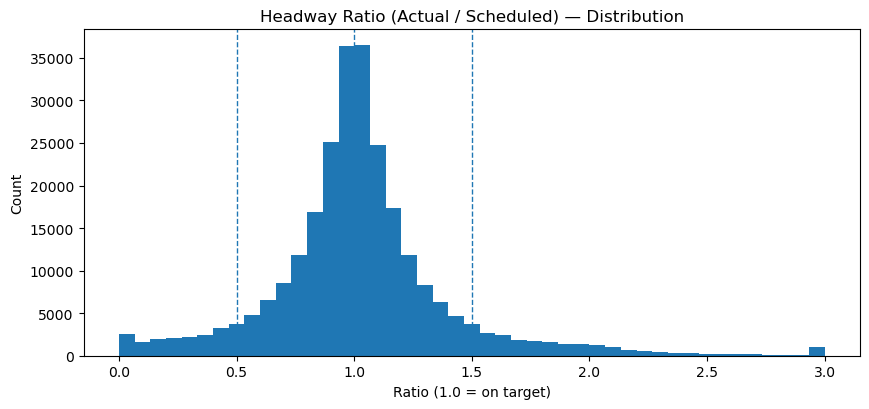

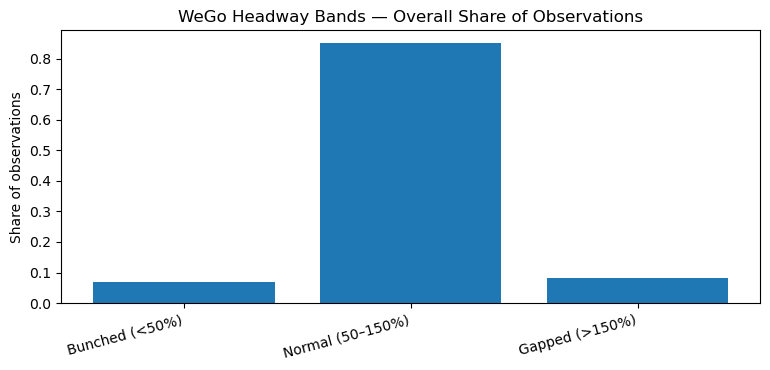


**What this means in plain English**

- We checked how evenly buses were spaced:
  - **Bunched (<50% of the planned gap): 6.8%**
  - **Normal (50–150%): 85.0%**
  - **Gapped (>150%): 8.2%**

- Another view of reliability:
  - **Within ±25%** of plan: **66.7%**  
  - **Within ±50%** of plan: **85.0%**  
  - **Typical spacing error** (median |% dev|): **14.9%**  
  - **Rider “bad day”** (P90 |% dev|): **65.0%**

- Read the histogram like this: left of **0.5** is **bunched**, around **1.0** is on target, right of **1.5** is **gapped**.




In [22]:
# Q5 — Headway Reliability with WeGo Policy Bands (using canonical aliases)
# - What: Quantify spacing reliability and evaluate WeGo’s percent of scheduled headway policy bands:
    # Definitions:
    #   hdwy_pct_dev = (Actual - Scheduled) / Scheduled   # deviation, centered at 0
    #   ratio r       = 1 + hdwy_pct_dev                  # actual / scheduled, centered at 1
    #
    # Policy bands:
    #   - Bunched <50% of scheduled   → r < 0.50
    #   - Normal  50–150%             → 0.50 ≤ r ≤ 1.50
    #   - Gapped  >150%               → r > 1.50
# - Why: Translate “bunching/gapping” into clear policy categories for stakeholders.
# - How: Use DF_OTP['hdwy_pct_dev'] (ratio = actual/scheduled; 1.0 on target; <1 bunching; >1 gapping).
#        Guarded by SCHEDULED_HDWY>0 from Step 0 (hdwy_pct_dev is NaN when invalid).
#        Optional “Clean Headway” lens excludes rows where PREV_SCHED_STOP_CANCELLED==1.
#
# Outputs:
#   1) Overall KPIs (±25/±50 bands, median|%dev|, P90|%dev|)
#   2) Policy band shares (overall + by Peak/Off-peak)
#   3) Histogram with policy markers; bar chart of band shares
#   4) Plain-English narrative for slides


#

import numpy as np
import pandas as pd
from IPython.display import display, Markdown

def _ensure(df, cols): return all(c in df.columns for c in cols)
def _style_pct(df: pd.DataFrame, cols):
    fmt = {c: "{:.1%}" for c in cols if c in df.columns}
    return df.style.format(fmt)

need_cols = ["hdwy_pct_dev"]
if 'DF_OTP' not in globals() or DF_OTP.empty or not _ensure(DF_OTP, need_cols):
    print("DF_OTP missing 'hdwy_pct_dev'. Run Step 0 first.")
else:
    CLEAN_HEADWAY = False  # toggle for “pure” spacing lens | Optional: set CLEAN_HEADWAY=True to exclude rows where PREV_SCHED_STOP_CANCELLED == 1.

    use_cols = ["hdwy_pct_dev","peak","ROUTE_ABBR","route_name"]
    if "PREV_SCHED_STOP_CANCELLED" in DF_OTP.columns:
        use_cols.append("PREV_SCHED_STOP_CANCELLED")
    dfx = DF_OTP.loc[:, [c for c in use_cols if c in DF_OTP.columns]].copy()

    # Valid rows
    mask = dfx["hdwy_pct_dev"].notna()
    if CLEAN_HEADWAY and "PREV_SCHED_STOP_CANCELLED" in dfx.columns:
        mask &= (pd.to_numeric(dfx["PREV_SCHED_STOP_CANCELLED"], errors="coerce").fillna(0) != 1)
    dfx = dfx.loc[mask].copy()

    if dfx.empty:
        print("No valid headway rows after filtering.")
    else:
        # ---- FIX: use deviation -> ratio ----
        dev = dfx["hdwy_pct_dev"].astype(float)  # deviation, centered at 0
        r   = 1.0 + dev                           # ratio, centered at 1

        # Core reliability stats (use deviation magnitude)
        dfx["abs_dev"]   = dev.abs()
        dfx["within_25"] = dfx["abs_dev"] <= 0.25
        dfx["within_50"] = dfx["abs_dev"] <= 0.50

        # Policy bands on the RATIO r
        dfx["band_policy"] = np.select(
            [r < 0.50, (r >= 0.50) & (r <= 1.50), r > 1.50],
            ["Bunched (<50%)", "Normal (50–150%)", "Gapped (>150%)"],
            default="Normal (50–150%)"
        )
        band_order = ["Bunched (<50%)", "Normal (50–150%)", "Gapped (>150%)"]

        # =========================
        # A) Overall KPIs
        # =========================
        overall = pd.DataFrame({
            "n":[int(len(dfx))],
            "within_25":[dfx["within_25"].mean()],
            "within_50":[dfx["within_50"].mean()],
            "med_abs_dev":[dfx["abs_dev"].median()],
            "p90_abs_dev":[dfx["abs_dev"].quantile(0.90)]
        })
        print("Overall Headway Reliability:")
        display(_style_pct(overall, ["within_25","within_50","med_abs_dev","p90_abs_dev"]))

        # =========================
        # B) Policy band shares — overall and by Peak/Off-peak
        # =========================
        overall_bands = (dfx["band_policy"]
                           .value_counts(normalize=True)
                           .reindex(band_order, fill_value=0.0)
                           .rename("share")
                           .rename_axis("band")
                           .reset_index())
        counts = dfx["band_policy"].value_counts().to_dict()
        overall_bands["n"] = overall_bands["band"].map(counts).fillna(0).astype(int)

        print("WeGo Policy Headway Bands — Overall Share:")
        display(_style_pct(overall_bands[["band","n","share"]].set_index("band"), ["share"]))

        if "peak" in dfx.columns:
            by_peak = (dfx.groupby(["peak","band_policy"], observed=True)
                         .size().rename("n").reset_index())
            totals = by_peak.groupby("peak", observed=True)["n"].transform("sum")
            by_peak["share"] = by_peak["n"] / totals
            by_peak["band_policy"] = pd.Categorical(by_peak["band_policy"], categories=band_order, ordered=True)
            by_peak["peak"] = pd.Categorical(by_peak["peak"], categories=["Peak","Off-peak"], ordered=True)
            by_peak = by_peak.sort_values(["peak","band_policy"]).reset_index(drop=True)

            print("WeGo Policy Headway Bands — Peak vs Off-peak:")
            by_peak_wide = (by_peak.pivot(index="band_policy", columns="peak", values="share")
                                   .reindex(band_order))
            for col in ["Peak","Off-peak"]:
                if col not in by_peak_wide.columns:
                    by_peak_wide[col] = 0.0
            display(_style_pct(by_peak_wide[["Peak","Off-peak"]], ["Peak","Off-peak"]))

        # =========================
        # C) Visuals
        # =========================
        try:
            import matplotlib.pyplot as plt

            # 1) Histogram of RATIO r (clipped for readability) + band markers
            plt.figure(figsize=(8.8, 4.2))
            vals = r.clip(0, 3.0).to_numpy()
            plt.hist(vals, bins=45)
            plt.title("Headway Ratio (Actual / Scheduled) — Distribution")
            plt.xlabel("Ratio (1.0 = on target)")
            plt.ylabel("Count")
            for v in [0.5, 1.0, 1.5]:
                plt.axvline(v, linestyle="--", linewidth=1)
            plt.tight_layout()
            plt.show()

            # 2) Overall band shares
            plt.figure(figsize=(7.8, 3.8))
            y = overall_bands.set_index("band")["share"].reindex(band_order)
            plt.bar(y.index.astype(str), y.values)
            plt.title("WeGo Headway Bands — Overall Share of Observations")
            plt.ylabel("Share of observations")
            plt.xticks(rotation=15, ha="right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"(Visuals skipped — {e})")

        # =========================
        # D) Narrative
        # =========================
        share_dict = overall_bands.set_index("band")["share"].to_dict()
        s_bunched  = share_dict.get("Bunched (<50%)", 0.0)
        s_normal   = share_dict.get("Normal (50–150%)", 0.0)
        s_gapped   = share_dict.get("Gapped (>150%)", 0.0)
        w25 = float(overall["within_25"].iloc[0])
        w50 = float(overall["within_50"].iloc[0])
        med = float(overall["med_abs_dev"].iloc[0])
        p90 = float(overall["p90_abs_dev"].iloc[0])

        clean_msg = "🔍 Clean Headway lens active — cancelled-prior-stop rows are excluded." if CLEAN_HEADWAY else ""
        narrative = f"""
**What this means in plain English**

- We checked how evenly buses were spaced:
  - **Bunched (<50% of the planned gap): {s_bunched:.1%}**
  - **Normal (50–150%): {s_normal:.1%}**
  - **Gapped (>150%): {s_gapped:.1%}**

- Another view of reliability:
  - **Within ±25%** of plan: **{w25:.1%}**  
  - **Within ±50%** of plan: **{w50:.1%}**  
  - **Typical spacing error** (median |% dev|): **{med:.1%}**  
  - **Rider “bad day”** (P90 |% dev|): **{p90:.1%}**

- Read the histogram like this: left of **0.5** is **bunched**, around **1.0** is on target, right of **1.5** is **gapped**.

{clean_msg}
"""
        display(Markdown(narrative))


#### Clean Headway = True (EXCLUDING rows where PREV_SCHED_STOP_CANCELLED == 1)

Overall Headway Reliability:


,n,within_25,within_50,med_abs_dev,p90_abs_dev
0,261741,67.0%,85.4%,14.8%,63.5%


WeGo Policy Headway Bands — Overall Share:


,n,share
band,,
Bunched (<50%),17515,6.7%
Normal (50–150%),223437,85.4%
Gapped (>150%),20789,7.9%


WeGo Policy Headway Bands — Peak vs Off-peak:


peak,Peak,Off-peak
band_policy,,
Bunched (<50%),9.3%,5.2%
Normal (50–150%),80.8%,88.0%
Gapped (>150%),9.9%,6.8%


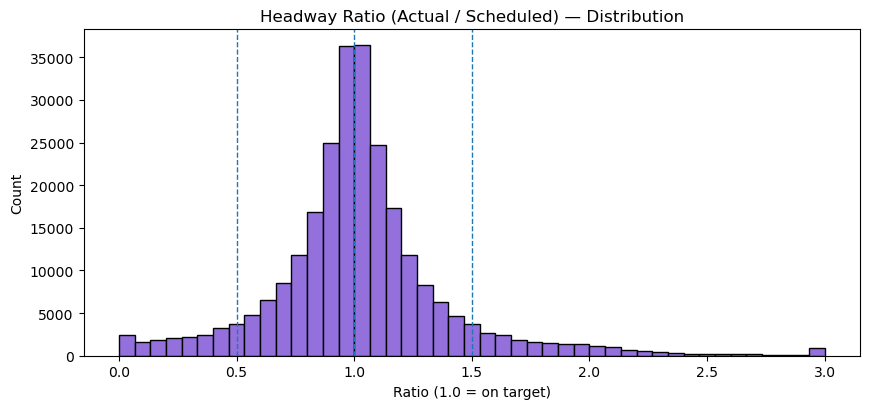

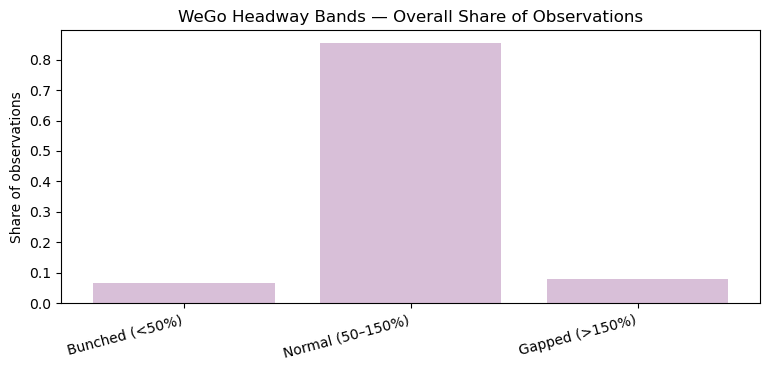


**What this means in plain English**

- We checked how evenly buses were spaced:
  - **Bunched (<50% of the planned gap): 6.7%**
  - **Normal (50–150%): 85.4%**
  - **Gapped (>150%): 7.9%**

- Another view of reliability:
  - **Within ±25%** of plan: **67.0%**  
  - **Within ±50%** of plan: **85.4%**  
  - **Typical spacing error** (median |% dev|): **14.8%**  
  - **Rider “bad day”** (P90 |% dev|): **63.5%**

- Read the histogram like this: left of **0.5** is **bunched**, around **1.0** is on target, right of **1.5** is **gapped**.

🔍 Clean Headway lens active — cancelled-prior-stop rows are excluded.


In [23]:
# Q5 — Headway Reliability with WeGo Policy Bands (using canonical aliases)
# - What: Quantify spacing reliability and evaluate WeGo’s percent of scheduled headway policy bands:
    # Definitions:
    #   hdwy_pct_dev = (Actual - Scheduled) / Scheduled   # deviation, centered at 0
    #   ratio r       = 1 + hdwy_pct_dev                  # actual / scheduled, centered at 1
    #
    # Policy bands:
    #   - Bunched <50% of scheduled   → r < 0.50
    #   - Normal  50–150%             → 0.50 ≤ r ≤ 1.50
    #   - Gapped  >150%               → r > 1.50
# - Why: Translate “bunching/gapping” into clear policy categories for stakeholders.
# - How: Use DF_OTP['hdwy_pct_dev'] (ratio = actual/scheduled; 1.0 on target; <1 bunching; >1 gapping).
#        Guarded by SCHEDULED_HDWY>0 from Step 0 (hdwy_pct_dev is NaN when invalid).
#        Optional “Clean Headway” lens excludes rows where PREV_SCHED_STOP_CANCELLED==1.
#
# Outputs:
#   1) Overall KPIs (±25/±50 bands, median|%dev|, P90|%dev|)
#   2) Policy band shares (overall + by Peak/Off-peak)
#   3) Histogram with policy markers; bar chart of band shares
#   4) Plain-English narrative for slides


#

import numpy as np
import pandas as pd
from IPython.display import display, Markdown

def _ensure(df, cols): return all(c in df.columns for c in cols)
def _style_pct(df: pd.DataFrame, cols):
    fmt = {c: "{:.1%}" for c in cols if c in df.columns}
    return df.style.format(fmt)

need_cols = ["hdwy_pct_dev"]
if 'DF_OTP' not in globals() or DF_OTP.empty or not _ensure(DF_OTP, need_cols):
    print("DF_OTP missing 'hdwy_pct_dev'. Run Step 0 first.")
else:
    CLEAN_HEADWAY = True  # toggle for “pure” spacing lens | Optional: set CLEAN_HEADWAY=False to include rows where PREV_SCHED_STOP_CANCELLED == 1.

    use_cols = ["hdwy_pct_dev","peak","ROUTE_ABBR","route_name"]
    if "PREV_SCHED_STOP_CANCELLED" in DF_OTP.columns:
        use_cols.append("PREV_SCHED_STOP_CANCELLED")
    dfx = DF_OTP.loc[:, [c for c in use_cols if c in DF_OTP.columns]].copy()

    # Valid rows
    mask = dfx["hdwy_pct_dev"].notna()
    if CLEAN_HEADWAY and "PREV_SCHED_STOP_CANCELLED" in dfx.columns:
        mask &= (pd.to_numeric(dfx["PREV_SCHED_STOP_CANCELLED"], errors="coerce").fillna(0) != 1)
    dfx = dfx.loc[mask].copy()

    if dfx.empty:
        print("No valid headway rows after filtering.")
    else:
        # ---- FIX: use deviation -> ratio ----
        dev = dfx["hdwy_pct_dev"].astype(float)  # deviation, centered at 0
        r   = 1.0 + dev                           # ratio, centered at 1

        # Core reliability stats (use deviation magnitude)
        dfx["abs_dev"]   = dev.abs()
        dfx["within_25"] = dfx["abs_dev"] <= 0.25
        dfx["within_50"] = dfx["abs_dev"] <= 0.50

        # Policy bands on the RATIO r
        dfx["band_policy"] = np.select(
            [r < 0.50, (r >= 0.50) & (r <= 1.50), r > 1.50],
            ["Bunched (<50%)", "Normal (50–150%)", "Gapped (>150%)"],
            default="Normal (50–150%)"
        )
        band_order = ["Bunched (<50%)", "Normal (50–150%)", "Gapped (>150%)"]

        # =========================
        # A) Overall KPIs
        # =========================
        overall = pd.DataFrame({
            "n":[int(len(dfx))],
            "within_25":[dfx["within_25"].mean()],
            "within_50":[dfx["within_50"].mean()],
            "med_abs_dev":[dfx["abs_dev"].median()],
            "p90_abs_dev":[dfx["abs_dev"].quantile(0.90)]
        })
        print("Overall Headway Reliability:")
        display(_style_pct(overall, ["within_25","within_50","med_abs_dev","p90_abs_dev"]))

        # =========================
        # B) Policy band shares — overall and by Peak/Off-peak
        # =========================
        overall_bands = (dfx["band_policy"]
                           .value_counts(normalize=True)
                           .reindex(band_order, fill_value=0.0)
                           .rename("share")
                           .rename_axis("band")
                           .reset_index())
        counts = dfx["band_policy"].value_counts().to_dict()
        overall_bands["n"] = overall_bands["band"].map(counts).fillna(0).astype(int)

        print("WeGo Policy Headway Bands — Overall Share:")
        display(_style_pct(overall_bands[["band","n","share"]].set_index("band"), ["share"]))

        if "peak" in dfx.columns:
            by_peak = (dfx.groupby(["peak","band_policy"], observed=True)
                         .size().rename("n").reset_index())
            totals = by_peak.groupby("peak", observed=True)["n"].transform("sum")
            by_peak["share"] = by_peak["n"] / totals
            by_peak["band_policy"] = pd.Categorical(by_peak["band_policy"], categories=band_order, ordered=True)
            by_peak["peak"] = pd.Categorical(by_peak["peak"], categories=["Peak","Off-peak"], ordered=True)
            by_peak = by_peak.sort_values(["peak","band_policy"]).reset_index(drop=True)

            print("WeGo Policy Headway Bands — Peak vs Off-peak:")
            by_peak_wide = (by_peak.pivot(index="band_policy", columns="peak", values="share")
                                   .reindex(band_order))
            for col in ["Peak","Off-peak"]:
                if col not in by_peak_wide.columns:
                    by_peak_wide[col] = 0.0
            display(_style_pct(by_peak_wide[["Peak","Off-peak"]], ["Peak","Off-peak"]))

        # =========================
        # C) Visuals
        # =========================
        try:
            import matplotlib.pyplot as plt

            # 1) Histogram of RATIO r (clipped for readability) + band markers
            plt.figure(figsize=(8.8, 4.2))
            vals = r.clip(0, 3.0).to_numpy()
            plt.hist(vals, bins=45, color = 'mediumpurple', edgecolor= 'black')
            plt.title("Headway Ratio (Actual / Scheduled) — Distribution")
            plt.xlabel("Ratio (1.0 = on target)")
            plt.ylabel("Count")
            for v in [0.5, 1.0, 1.5]:
                plt.axvline(v, linestyle="--", linewidth=1)
            plt.tight_layout()
            plt.savefig('qfive hist')
            plt.show()
    

            # 2) Overall band shares
            plt.figure(figsize=(7.8, 3.8))
            y = overall_bands.set_index("band")["share"].reindex(band_order)
            plt.bar(y.index.astype(str), y.values, color='thistle')
            plt.title("WeGo Headway Bands — Overall Share of Observations")
            plt.ylabel("Share of observations")
            plt.xticks(rotation=15, ha="right")
            plt.tight_layout()
            plt.savefig('qfive bar')
            plt.show()
        except Exception as e:
            print(f"(Visuals skipped — {e})")

        # =========================
        # D) Narrative
        # =========================
        share_dict = overall_bands.set_index("band")["share"].to_dict()
        s_bunched  = share_dict.get("Bunched (<50%)", 0.0)
        s_normal   = share_dict.get("Normal (50–150%)", 0.0)
        s_gapped   = share_dict.get("Gapped (>150%)", 0.0)
        w25 = float(overall["within_25"].iloc[0])
        w50 = float(overall["within_50"].iloc[0])
        med = float(overall["med_abs_dev"].iloc[0])
        p90 = float(overall["p90_abs_dev"].iloc[0])

        clean_msg = "🔍 Clean Headway lens active — cancelled-prior-stop rows are excluded." if CLEAN_HEADWAY else ""
        narrative = f"""
**What this means in plain English**

- We checked how evenly buses were spaced:
  - **Bunched (<50% of the planned gap): {s_bunched:.1%}**
  - **Normal (50–150%): {s_normal:.1%}**
  - **Gapped (>150%): {s_gapped:.1%}**

- Another view of reliability:
  - **Within ±25%** of plan: **{w25:.1%}**  
  - **Within ±50%** of plan: **{w50:.1%}**  
  - **Typical spacing error** (median |% dev|): **{med:.1%}**  
  - **Rider “bad day”** (P90 |% dev|): **{p90:.1%}**

- Read the histogram like this: left of **0.5** is **bunched**, around **1.0** is on target, right of **1.5** is **gapped**.

{clean_msg}
"""
        display(Markdown(narrative))


### 6) How much impact does being late or too spaced out at the first stop have downstream?

#### Q6A — Downstream performance by first-stop OTP class

first_class,trips,downstream_otp,downstream_mean_abs_adh
On-time,58557,84.6%,3.24
Early,1129,65.9%,6.48
Late,6261,27.9%,11.34


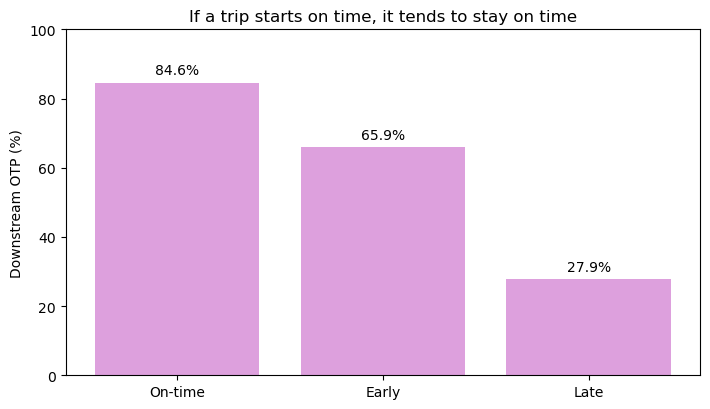

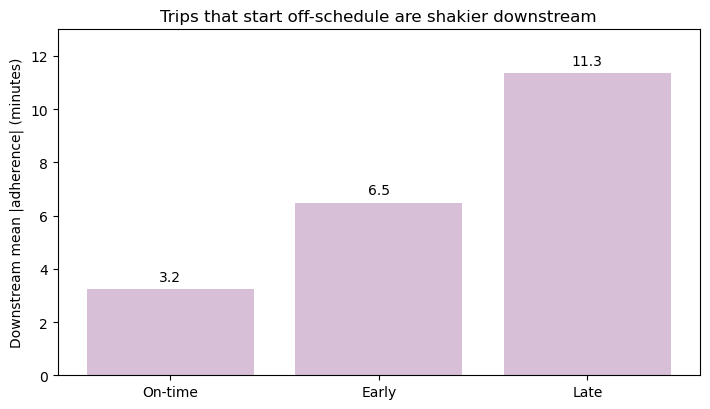

### Q6 — What this means (for non-technical audiences)
- The **first stop sets the tone**.
- Trips that **start on time** have the **best downstream OTP** and the **lowest average deviation**.
- Trips that **start late** rarely recover — downstream OTP is lower by **56.8%** vs trips that start on time.
- Trips that **start early** also underperform: downstream OTP is lower by **18.7%** vs on-time starts, and average deviation is higher.
- Operationally: focus on **launching trips on time** (terminal dispatch & recovery) to improve reliability end-to-end.

In [25]:
# Q6 — First-Stop Impact on Downstream Performance (storytelling version)
# - What: Does how a trip starts (first stop status) predict how it performs later?
# - Why: If the first stop “sets the tone,” we should see worse downstream reliability when trips start early/late.
# - How:
#     1) Identify the first stop per trip via earliest SCHEDULED_TIME.
#     2) Classify first stop as On-time / Early / Late using policy-adjusted flags.
#     3) Summarize downstream (rest-of-trip) OTP and |adherence|.
#     4) Show a simple table + two bar charts that tell the story clearly.

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ---------- Safety & prep ----------
need_cols = {"trip_key","SCHEDULED_TIME","ADHERENCE","is_ontime","is_late","is_early"}
if 'DF_OTP' not in globals() or DF_OTP.empty or not need_cols.issubset(DF_OTP.columns):
    raise ValueError("DF_OTP is missing required columns for Q6. Run Step 0 to build DF_OTP with adjusted policy flags.")

d = DF_OTP.copy()
d["ADHERENCE"] = pd.to_numeric(d["ADHERENCE"], errors="coerce")
d["SCHEDULED_TIME"] = pd.to_datetime(d["SCHEDULED_TIME"], errors="coerce")
d["ACTUAL_DEPARTURE_TIME"] = pd.to_datetime(d.get("ACTUAL_DEPARTURE_TIME"), errors="coerce")

# ---------- Identify the first stop per trip ----------
first_idx = (d.sort_values(["trip_key","SCHEDULED_TIME"])
               .groupby("trip_key", observed=True)
               .head(1).index)

first = d.loc[first_idx, ["trip_key","ADHERENCE","is_ontime","is_late","is_early"]].copy()
first = first.rename(columns={"ADHERENCE":"first_adherence"})
first["first_class"] = np.select(
    [first["is_ontime"].eq(1), first["is_late"].eq(1), first["is_early"].eq(1)],
    ["On-time","Late","Early"], default="Unclassified"
)

# ---------- Downstream summaries (exclude the first row of each trip) ----------
down = d.drop(index=first_idx).copy()
down_trip = (down.groupby("trip_key", observed=True)
                .agg(
                    downstream_otp=("is_ontime","mean"),
                    downstream_mean_adh=("ADHERENCE","mean"),
                    downstream_abs_adh=("ADHERENCE", lambda s: s.abs().mean()),
                    rows=("ADHERENCE","size")
                )
                .reset_index())

# Join first-stop info to downstream summary
q6 = first.merge(down_trip, on="trip_key", how="inner")

# ---------- Table: downstream performance by first-stop class ----------
order = pd.CategoricalDtype(categories=["On-time","Early","Late","Unclassified"], ordered=True)
t_class = (q6.assign(first_class=q6["first_class"].astype(order))
             .groupby("first_class", observed=True)
             .agg(trips=("trip_key","size"),
                  downstream_otp=("downstream_otp","mean"),
                  downstream_mean_abs_adh=("downstream_abs_adh","mean"))
             .reset_index()
             .sort_values("first_class"))

display(Markdown("#### Q6A — Downstream performance by first-stop OTP class"))
styler = t_class.style.format({
    "downstream_otp":"{:.1%}",
    "downstream_mean_abs_adh":"{:.2f}"
}).set_caption("Effect of Start Status on Downstream Performance")
try:
    display(styler.hide(axis='index'))  # pandas ≥2.0
except Exception:
    display(styler.set_properties(**{'text-align': 'center'}))  # fallback for older pandas

# ---------- Visuals: bar charts that tell the story ----------
# 1) Downstream OTP by first-stop class
plt.figure(figsize=(7.2,4.2))
plt.bar(t_class["first_class"], t_class["downstream_otp"]*100, color = 'plum')
plt.ylim(0, 100)
plt.ylabel("Downstream OTP (%)")
plt.title("If a trip starts on time, it tends to stay on time")
# simple value labels
for x, y in zip(t_class["first_class"], t_class["downstream_otp"]*100):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.savefig('downstream otp')
plt.show()

# 2) Downstream mean |adherence| by first-stop class
plt.figure(figsize=(7.2,4.2))
plt.bar(t_class["first_class"], t_class["downstream_mean_abs_adh"], color = 'thistle')
plt.ylabel("Downstream mean |adherence| (minutes)")
plt.title("Trips that start off-schedule are shakier downstream")
for x, y in zip(t_class["first_class"], t_class["downstream_mean_abs_adh"]):
    plt.text(x, y + 0.2, f"{y:.1f}", ha="center", va="bottom", fontsize=10)
plt.ylim(0, 13)
plt.tight_layout()
plt.savefig('downstream mean')
plt.show()

# ---------- Gap estimates for bullets ----------
row_on   = t_class.loc[t_class["first_class"]=="On-time", "downstream_otp"].max()
row_late = t_class.loc[t_class["first_class"]=="Late",    "downstream_otp"].max()
row_early= t_class.loc[t_class["first_class"]=="Early",   "downstream_otp"].max()
delta_late  = (row_on - row_late)  if pd.notna(row_on) and pd.notna(row_late)  else np.nan
delta_early = (row_on - row_early) if pd.notna(row_on) and pd.notna(row_early) else np.nan

# ---------- Layman narrative (ready to paste in slides) ----------
bullets = [
    "The **first stop sets the tone**.",
    "Trips that **start on time** have the **best downstream OTP** and the **lowest average deviation**.",
    ("Trips that **start late** rarely recover — downstream OTP is lower by "
     f"**{delta_late:.1%}** vs trips that start on time.") if pd.notna(delta_late) else None,
    ("Trips that **start early** also underperform: downstream OTP is lower by "
     f"**{delta_early:.1%}** vs on-time starts, and average deviation is higher.") if pd.notna(delta_early) else None,
    "Operationally: focus on **launching trips on time** (terminal dispatch & recovery) to improve reliability end-to-end."
]
display(Markdown("### Q6 — What this means (for non-technical audiences)\n" + "\n".join(f"- {b}" for b in bullets if b)))


### 7) What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?

In [ ]:
# Q7 — Layover at Trip Start vs Downstream Stability (story-first version)
# - What: Does recovery time at the first stop lead to steadier trips?
# - Why: Stakeholders need a simple picture: short/zero layover vs a few extra minutes.
# - How:
#     1) Find first stop per trip by earliest SCHEDULED_TIME.
#     2) Compute actual layover = ACTUAL_DEPARTURE_TIME - ACTUAL_ARRIVAL_TIME (minutes).
#     3) Clip wild outliers (e.g., cross-day clock issues) for grouping only.
#     4) Bin layover into intuitive buckets and summarize downstream OTP and |adherence|.
#     5) Show two bar charts + a layman narrative.

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ---------- Safety & prep ----------
need_cols = {"trip_key","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME","ADHERENCE","is_ontime"}
if 'DF_OTP' not in globals() or DF_OTP.empty or not need_cols.issubset(DF_OTP.columns):
    raise ValueError("DF_OTP is missing required columns for Q7.")

d = DF_OTP.copy()
d["ADHERENCE"] = pd.to_numeric(d["ADHERENCE"], errors="coerce")
for c in ["SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"]:
    d[c] = pd.to_datetime(d[c], errors="coerce")

# ---------- First stop per trip ----------
first_idx = (d.sort_values(["trip_key","SCHEDULED_TIME"])
               .groupby("trip_key", observed=True)
               .head(1).index)
first = d.loc[first_idx, ["trip_key","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"]].copy()

# Actual layover minutes at start (may be NaN if arrival or departure missing)
first["layover_actual_min"] = (
    (first["ACTUAL_DEPARTURE_TIME"] - first["ACTUAL_ARRIVAL_TIME"]).dt.total_seconds() / 60.0
)

# ---------- Downstream (exclude first row) ----------
down = d.drop(index=first_idx).copy()
down_trip = (down.groupby("trip_key", observed=True)
                .agg(
                    downstream_otp=("is_ontime","mean"),
                    downstream_mean_abs_adh=("ADHERENCE", lambda s: s.abs().mean()),
                    rows=("ADHERENCE","size")
                )
                .reset_index())

# Join and keep trips where layover is known
q7 = first[["trip_key","layover_actual_min"]].merge(down_trip, on="trip_key", how="inner").dropna(subset=["layover_actual_min"])

# ---------- Clip outliers for grouping (keep raw values for diagnostics if needed) ----------
# We clip to [-5, 60] mins for *grouping/plotting* to avoid a few cross-day timestamps dominating the bins.
q7["layover_clip"] = q7["layover_actual_min"].clip(lower=-5, upper=60)

# Intuitive layover bins
bins = [-np.inf, 0, 5, 10, 20, np.inf]
labels = ["≤0 min", "0–5 min", "5–10 min", "10–20 min", "20+ min"]
q7["layover_bin"] = pd.cut(q7["layover_clip"], bins=bins, labels=labels, right=True, include_lowest=True, ordered=True)

# ---------- Summaries by bin ----------
t_bins = (q7.groupby("layover_bin", observed=True)
            .agg(
                trips=("trip_key","size"),
                mean_layover=("layover_actual_min","mean"),
                mean_downstream_abs_adh=("downstream_mean_abs_adh","mean"),
                mean_downstream_otp=("downstream_otp","mean")
            )
            .reset_index())

display(Markdown("#### Q7A — Downstream performance by start layover bin"))
styler = t_bins.style.format({
    "mean_layover":"{:.1f}",
    "mean_downstream_abs_adh":"{:.2f}",
    "mean_downstream_otp":"{:.1%}"
}).set_caption("Longer layover (recovery) generally relates to steadier trips")
try:
    display(styler.hide(axis='index'))  # pandas ≥2.0
except Exception:
    display(styler.set_properties(**{'text-align': 'center'}))

# ---------- Visuals: two simple bar charts ----------
# 1) Downstream OTP by bin
plt.figure(figsize=(7.2,4.2))
plt.bar(t_bins["layover_bin"].astype(str), t_bins["mean_downstream_otp"]*100)
plt.ylim(0, 100)
plt.ylabel("Downstream OTP (%)")
plt.title("More recovery time at the start → higher downstream OTP")
for x, y in zip(t_bins["layover_bin"].astype(str), t_bins["mean_downstream_otp"]*100):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()

# 2) Downstream mean |adherence| by bin
plt.figure(figsize=(7.2,4.2))
plt.bar(t_bins["layover_bin"].astype(str), t_bins["mean_downstream_abs_adh"])
plt.ylabel("Downstream mean |adherence| (minutes)")
plt.title("Short/zero layovers are associated with shakier trips")
for x, y in zip(t_bins["layover_bin"].astype(str), t_bins["mean_downstream_abs_adh"]):
    plt.text(x, y + 0.2, f"{y:.1f}", ha="center", va="bottom", fontsize=10)
plt.ylim(0, 8)
plt.tight_layout()
plt.show()

# ---------- Layman narrative (ready to read on a slide) ----------
# Pull simple deltas for the story: compare ≤0 min to 10–20 min bins if both exist.
def _get(tbl, col, key):
    try:
        return float(tbl.loc[tbl["layover_bin"]==key, col].iloc[0])
    except Exception:
        return np.nan

otp_zero   = _get(t_bins, "mean_downstream_otp", "≤0 min")
otp_10_20  = _get(t_bins, "mean_downstream_otp", "10–20 min")
abs_zero   = _get(t_bins, "mean_downstream_abs_adh", "≤0 min")
abs_10_20  = _get(t_bins, "mean_downstream_abs_adh", "10–20 min")

bullets = [
    "Think of **layover** as *recovery time* at the terminal before a bus leaves.",
    "Trips with **a few minutes of layover** tend to stay steadier and more on-time than those with **zero or negative layover**.",
    (f"Example: OTP improves from **{otp_zero*100:.1f}%** (≤0 min) to **{otp_10_20*100:.1f}%** (10–20 min).")
        if pd.notna(otp_zero) and pd.notna(otp_10_20) else None,
    (f"Average deviation drops from **{abs_zero:.1f} min** (≤0 min) to **{abs_10_20:.1f} min** (10–20 min).")
        if pd.notna(abs_zero) and pd.notna(abs_10_20) else None,
    "Operational takeaway: **protect 10–20 minutes of recovery time** where feasible. "
    "Very short/zero layovers leave no time to ‘reset’, so delay carries into the trip."
]
display(Markdown("### Q7 — What this means (for non-technical audiences)\n" + "\n".join(f"- {b}" for b in bullets if b)))


### 8) What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

In [ ]:
# Q8 (simplified) — Does on-time performance get worse as trips progress?
# Assumes canonical DF_OTP with:
#   trip_key, SCHEDULED_TIME, ACTUAL_DEPARTURE_TIME, is_ontime, ADHERENCE (optional)

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ---------- 1) Working copy + datetime ----------
df = DF_OTP.copy()

to_dt = lambda s: pd.to_datetime(s, errors="coerce")
df["t_actual"] = to_dt(df.get("ACTUAL_DEPARTURE_TIME"))
df["t_sched"]  = to_dt(df.get("SCHEDULED_TIME"))
df["t_use"]    = df["t_actual"].where(df["t_actual"].notna(), df["t_sched"])

df = df.loc[df["t_use"].notna() & df["trip_key"].notna()].copy()

# ---------- 2) Trip progress (0–1) using minutes since first observed stop ----------
g = df.groupby("trip_key", observed=True)["t_use"]
start = g.transform("min")
end   = g.transform("max")

duration_min = (end - start).dt.total_seconds() / 60.0
duration_min = duration_min.replace(0, np.nan)  # avoid divide-by-zero on single-point trips

elapsed_min  = (df["t_use"] - start).dt.total_seconds() / 60.0
df["trip_progress"] = (elapsed_min / duration_min).clip(lower=0, upper=1)
df = df.loc[df["trip_progress"].notna()].copy()

# ---------- 3) 10% progress buckets ----------
bins   = np.linspace(0, 1, 11)
labels = np.arange(10, 110, 10)  # 10,20,…,100
df["progress_bin"] = pd.cut(df["trip_progress"], bins=bins, labels=labels, include_lowest=True, right=True)

# ---------- 4) Aggregate with *named aggregation* (this fixes your error) ----------
have_adh = "ADHERENCE" in df.columns
if have_adh:
    df["abs_adh"] = df["ADHERENCE"].abs()

agg_spec = dict(
    rows=("trip_progress", "size"),
    otp =("is_ontime", "mean"),
)
if have_adh:
    agg_spec["abs_adh_mean"] = ("abs_adh", "mean")

summ = (df.groupby("progress_bin", observed=True)
          .agg(**agg_spec)
          .reset_index())

# ensure all bins present
all_bins = pd.DataFrame({"progress_bin": pd.Categorical(labels, categories=labels, ordered=True)})
summ = all_bins.merge(summ, on="progress_bin", how="left")
summ["rows"] = summ["rows"].fillna(0).astype(int)
summ["otp"]  = summ["otp"].fillna(0.0)
if have_adh:
    summ["abs_adh_mean"] = summ["abs_adh_mean"].astype(float)

tbl = summ.rename(columns={
    "progress_bin":"Trip progress (%)",
    "rows":"Rows",
    "otp":"OTP",
    "abs_adh_mean":"Mean |adherence| (min)"
})
display(Markdown("### Q8 — Trip progress summary (0–100%)"))
display(tbl)

# ---------- 5) Plot 1: OTP vs Trip Progress ----------
plt.figure(figsize=(8,4.2))
x = tbl["Trip progress (%)"].astype(int)
y = tbl["OTP"]
plt.plot(x, y, marker="o")  # (1 figure, default colors, no style)
plt.title("OTP vs Trip Progress")
plt.xlabel("Trip Progress (%)")
plt.ylabel("On-time rate")
plt.ylim(0, 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

start_otp = float(y.iloc[0])
end_otp   = float(y.iloc[-1])
delta_pp  = (end_otp - start_otp) * 100

display(Markdown(
f"""
**Takeaway — OTP line**

- Start of trip (0–10%): **{start_otp:.1%}** on-time  
- End of trip (90–100%): **{end_otp:.1%}** on-time  
- Change across the trip: **{delta_pp:+.1f} pp** (positive = improves; negative = degrades)
"""
))

# ---------- 6) Plot 2: Mean |Adherence| vs Trip Progress (if available) ----------
if have_adh:
    plt.figure(figsize=(8,4.2))
    y2 = tbl["Mean |adherence| (min)"]
    plt.plot(x, y2, marker="o")
    plt.title("Average Absolute Adherence vs Trip Progress")
    plt.xlabel("Trip Progress (%)")
    plt.ylabel("Mean |adherence| (minutes)")
    plt.grid(True, axis="y", linestyle="--", alpha=0.4)
    plt.show()

    start_abs = float(y2.iloc[0]) if pd.notna(y2.iloc[0]) else np.nan
    end_abs   = float(y2.iloc[-1]) if pd.notna(y2.iloc[-1]) else np.nan
    diff_abs  = end_abs - start_abs if np.all(pd.notna([start_abs, end_abs])) else np.nan

    display(Markdown(
    f"""
**Takeaway — adherence line**

- Start of trip (0–10%): **{start_abs:.2f} min** away from schedule on average  
- End of trip (90–100%): **{end_abs:.2f} min** away from schedule on average  
- Change across the trip: **{diff_abs:+.2f} min**  
  *(Positive = more minutes off schedule toward the end; negative = tighter to schedule.)*
    """
    ))
else:
    display(Markdown("> Note: `ADHERENCE` not found — skipped the adherence stability chart."))

# ---------- 7) Slide-ready wording ----------
direction = "decreases" if delta_pp < 0 else "increases"
bullet = f"On-time performance {direction} by {abs(delta_pp):.1f} percentage points from the start to the end of a typical trip."
if have_adh and pd.notna(tbl.get("Mean |adherence| (min)").iloc[0]):
    y2 = tbl["Mean |adherence| (min)"]
    start_abs = float(y2.iloc[0]); end_abs = float(y2.iloc[-1]); diff_abs = end_abs - start_abs
    trend = "drifts farther from" if diff_abs > 0 else "draws closer to"
    bullet2 = f"Average absolute adherence {trend} schedule by {abs(diff_abs):.2f} minutes over the course of a trip."
else:
    bullet2 = "Adherence trend not available (no ADHERENCE column)."

display(Markdown(
f"""
### Q8 — How to explain this slide (non-technical)
- We split each trip into ten slices from the **start (0–10%)** to the **end (90–100%)**.
- The **blue line** shows what share of departures are **on time** in each slice.
- The second line (if present) shows the **average minutes off schedule** (lower is better).

**Bottom line:** {bullet}  
{bullet2}
"""
))


### 9) Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

In [ ]:
# Q9 — Spatial and Temporal Patterns in Headway Deviation (policy bands, fixed dtype)
# - What: Identify where and when buses are too close (bunched) or too far apart (gapped).
# - Why: Headway reliability is critical to passenger wait time and perception of service.
# - How: Compute headway ratio = 1 + (HDWY_DEV / SCHEDULED_HDWY);
#         assign WeGo policy bands and summarize by route, time-of-day, and adherence.

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ---------- Safety check ----------
cols_needed = {"HDWY_DEV","SCHEDULED_HDWY","ADHERENCE","route_name","hour","peak"}
if 'DF_OTP' not in globals() or not cols_needed.issubset(DF_OTP.columns):
    raise ValueError("DF_OTP missing required columns for Q9 analysis.")

df9 = DF_OTP.copy()
df9["SCHEDULED_HDWY"] = pd.to_numeric(df9["SCHEDULED_HDWY"], errors="coerce")
df9["HDWY_DEV"] = pd.to_numeric(df9["HDWY_DEV"], errors="coerce")
df9["ADHERENCE"] = pd.to_numeric(df9["ADHERENCE"], errors="coerce")

# drop invalid or 0 headways
df9 = df9[df9["SCHEDULED_HDWY"] > 0].copy()
df9["hdwy_ratio"] = 1 + (df9["HDWY_DEV"] / df9["SCHEDULED_HDWY"])
df9["hdwy_pct_dev"] = (df9["HDWY_DEV"] / df9["SCHEDULED_HDWY"]) * 100

# ---------- Assign WeGo policy bands ----------
df9["band_policy"] = np.select(
    [
        df9["hdwy_ratio"] < 0.5,
        (df9["hdwy_ratio"] >= 0.5) & (df9["hdwy_ratio"] <= 1.5),
        df9["hdwy_ratio"] > 1.5
    ],
    ["Bunched (<50%)","Normal (50–150%)","Gapped (>150%)"],
    default=None  # ✅ fixed (avoids mixed dtype issue)
).astype("object")

# ---------- Aggregations ----------
band_share = (
    df9["band_policy"]
    .value_counts(normalize=True)
    .rename("share")
    .mul(100)
    .reset_index()
    .rename(columns={"index":"band_policy"})
)

by_route = (
    df9.groupby(["route_name","band_policy"], observed=True)
        .size()
        .unstack(fill_value=0)
)
by_route["Total"] = by_route.sum(axis=1)
if "Normal (50–150%)" in by_route.columns:
    by_route["Pct_Normal"] = by_route["Normal (50–150%)"] / by_route["Total"]
else:
    by_route["Pct_Normal"] = np.nan
by_route = by_route.sort_values("Pct_Normal", ascending=False).head(10)

by_hour = (
    df9.groupby("hour", observed=True)["hdwy_ratio"]
        .agg(["count","mean"])
        .rename(columns={"count":"n","mean":"avg_ratio"})
        .reset_index()
)

# ---------- Display summary tables ----------
display(Markdown("#### Q9A — Overall Headway Policy Bands"))
styler_bands = band_share.style.format({"share":"{:.1f}%"})
try:
    display(styler_bands.hide(axis='index'))
except Exception:
    display(styler_bands.set_properties(**{'text-align': 'center'}))

display(Markdown("#### Q9B — Top 10 Routes by Headway Stability (Highest % Normal)"))
styler_routes = by_route.style.format({"Pct_Normal":"{:.1%}"})
try:
    display(styler_routes.hide(axis='index'))
except Exception:
    display(styler_routes.set_properties(**{'text-align': 'center'}))

# ---------- Visual: Hourly pattern ----------
plt.figure(figsize=(8,4))
plt.plot(by_hour["hour"], by_hour["avg_ratio"], marker="o")
plt.axhline(1.0, color="gray", linestyle="--", label="Ideal (1.0)")
plt.axhline(0.5, color="red", linestyle="--", linewidth=0.8, label="Bunched threshold")
plt.axhline(1.5, color="orange", linestyle="--", linewidth=0.8, label="Gapped threshold")
plt.title("Average Headway Ratio by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Actual/Scheduled Headway Ratio")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Layman explanation ----------
normal_share = band_share.loc[band_share["band_policy"]=="Normal (50–150%)","share"].values
bunched_share = band_share.loc[band_share["band_policy"]=="Bunched (<50%)","share"].values
gapped_share  = band_share.loc[band_share["band_policy"]=="Gapped (>150%)","share"].values

bullets = [
    f"About **{normal_share[0]:.1f}%** of observed headways fall within the acceptable 50–150% band." if len(normal_share) else None,
    f"Roughly **{bunched_share[0]:.1f}%** are 'bunched' (buses too close together)." if len(bunched_share) else None,
    f"About **{gapped_share[0]:.1f}%** are 'gapped' (buses too far apart)." if len(gapped_share) else None,
    "Headway issues often occur during **peak hours**, when recovery time and traffic variability are highest.",
    "Routes with stronger 'normal' shares tend to align with more consistent adherence and better downstream OTP."
]
display(Markdown("### Q9 — What this means (for non-technical audiences)\n" + "\n".join(f"- {b}" for b in bullets if b)))


# Map

In [ ]:
# ============================================
# Do-it-all Folium Map: Reliability & Headways
# ============================================
# - Layers:
#   • All Routes (clustered)
#   • Per-Route toggle layers
#   • WeGo headway policy bands: Bunched / Normal / Gapped (by median ratio at each timepoint)
#   • Time-of-day: AM Peak, Midday, PM Peak, Night
# - Popups: readable summary (OTP/Late/Early, sample size, median headway ratio, band)
# - Controls: LayerControl, MiniMap, Fullscreen, Measure, Search (by timepoint/stop name)
# - Output: ../data/wego_reliability_map.html
#
# Notes:
# - Uses DF_OTP from Step 0 (policy-aligned subset), which includes:
#   LATITUDE, LONGITUDE, route_name, ROUTE_ABBR, ROUTE_DIRECTION_NAME, timepoint_name,
#   is_ontime, is_late, is_early, hour, hdwy_pct_dev (ratio), hdwy_valid (bool)
# - If some columns are missing, the code will skip the affected layer(s) and still render a map.

import pandas as pd, numpy as np
from pathlib import Path
import folium
from folium import plugins
import json

# ---------- Config ----------
OUT_HTML = Path("../data/wego_reliability_map.html")
MIN_N = 50  # minimum samples to plot (keeps map snappy; adjust as needed)
# color scale (late rate): green (good) -> red (bad)
LATE_MIN, LATE_MAX = 0.00, 0.50  # clamp legend between 0% and 50% late
AM_PEAK = (7, 9)
PM_PEAK = (16, 18)

# ---------- 0) Defensive checks ----------
req_geo = {"LATITUDE","LONGITUDE"}
req_core = {"ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name",
            "is_ontime","is_late","is_early"}
req_hdwy = {"hdwy_pct_dev","hdwy_valid"}

df = DF_OTP.copy()

# Ensure numeric types we need
for c in ["LATITUDE","LONGITUDE"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Early bail-out if no geos
if not req_geo.issubset(df.columns) or df["LATITUDE"].isna().all() or df["LONGITUDE"].isna().all():
    raise RuntimeError("DF_OTP must have LATITUDE/LONGITUDE with some non-null values to draw a map.")

# Keep rows with valid coords
df = df.loc[df["LATITUDE"].notna() & df["LONGITUDE"].notna()].copy()

# If route_name missing, fallback to ROUTE_ABBR string
if "route_name" not in df.columns and "ROUTE_ABBR" in df.columns:
    df["route_name"] = df["ROUTE_ABBR"].astype(str)

# If timepoint_name missing, fallback to TIME_POINT_ABBR
if "timepoint_name" not in df.columns and "TIME_POINT_ABBR" in df.columns:
    df["timepoint_name"] = df["TIME_POINT_ABBR"].astype(str)

# hour may be missing — time-of-day layers will gracefully skip
if "hour" in df.columns:
    df["hour"] = pd.to_numeric(df["hour"], errors="coerce")

# ----- helper: aggregate function over a slice -----
def agg_timepoints(dfin: pd.DataFrame) -> pd.DataFrame:
    have = req_core.intersection(dfin.columns)
    keys = ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","LATITUDE","LONGITUDE"]
    keys = [k for k in keys if k in have or k in {"LATITUDE","LONGITUDE"}]

    if not set(keys).issubset(dfin.columns):
        return pd.DataFrame(columns=keys + ["otp_rate","late_rate","early_rate","n",
                                            "hdwy_ratio_median","band_policy"])

    g = (dfin
         .groupby(keys, observed=True)
         .agg(otp_rate=("is_ontime","mean"),
              late_rate=("is_late","mean"),
              early_rate=("is_early","mean"),
              n=("is_ontime","size"))
         .reset_index())

    # Attach median headway ratio (if available)
    if req_hdwy.issubset(dfin.columns):
        r = (dfin.loc[dfin["hdwy_valid"]==True, ["TIME_POINT_ABBR","hdwy_pct_dev"]]
                   .groupby("TIME_POINT_ABBR", observed=True)["hdwy_pct_dev"].median()
                   .rename("hdwy_ratio_median"))
        if "TIME_POINT_ABBR" in g.columns:
            g = g.merge(r, left_on="TIME_POINT_ABBR", right_index=True, how="left")
    else:
        g["hdwy_ratio_median"] = np.nan

    # Policy bands from median ratio
    # - Bunched (<50%), Normal (50–150%), Gapped (>150%)
    rr = g["hdwy_ratio_median"]
    g["band_policy"] = np.select(
        [
            rr < 0.50,
            (rr >= 0.50) & (rr <= 1.50),
            rr > 1.50
        ],
        ["Bunched (<50%)","Normal (50–150%)","Gapped (>150%)"],
        default="Unknown"
    )
    return g

# ---------- 1) Master aggregate (all hours) ----------
d_all = agg_timepoints(df)
# Filter by sample size for plotting
d_all_plot = d_all.loc[d_all["n"] >= MIN_N].copy()

# ---------- 2) Time-of-day slices (if hour available) ----------
has_hour = "hour" in df.columns
d_am = d_mid = d_pm = d_night = pd.DataFrame(columns=d_all.columns)
if has_hour:
    q_am   = df["hour"].between(*AM_PEAK)
    q_pm   = df["hour"].between(*PM_PEAK)
    q_mid  = ~q_am & ~q_pm & df["hour"].between(9, 16, inclusive="neither")  # 10–15
    q_nite = ~df["hour"].between(6, 22)  # before 7 or after 22

    d_am   = agg_timepoints(df.loc[q_am])
    d_mid  = agg_timepoints(df.loc[q_mid])
    d_pm   = agg_timepoints(df.loc[q_pm])
    d_night= agg_timepoints(df.loc[q_nite])

    d_am   = d_am.loc[d_am["n"]   >= MIN_N]
    d_mid  = d_mid.loc[d_mid["n"] >= MIN_N]
    d_pm   = d_pm.loc[d_pm["n"]   >= MIN_N]
    d_night= d_night.loc[d_night["n"] >= MIN_N]

# ---------- 3) Folium map scaffold ----------
# Center = median lat/lon of plotted points
center_lat = float(d_all_plot["LATITUDE"].median())
center_lon = float(d_all_plot["LONGITUDE"].median())
m = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles="cartodbpositron")

# Controls
plugins.Fullscreen().add_to(m)
plugins.MiniMap(toggle_display=True).add_to(m)
plugins.MeasureControl(position='topleft', primary_length_unit='meters').add_to(m)

# Colormap for late rate
import branca.colormap as cm
cmap = cm.LinearColormap(
    colors=["#2ECC71","#F1C40F","#E67E22","#E74C3C"],  # green → yellow → orange → red
    vmin=LATE_MIN, vmax=LATE_MAX
).to_step(10)
cmap.caption = "Late Rate (share of stops late)"
cmap.add_to(m)

# Helper to color by late rate, clamped
def color_for(late_rate):
    x = 0.0 if pd.isna(late_rate) else float(late_rate)
    x = max(LATE_MIN, min(LATE_MAX, x))
    return cmap(x)

# Helper: marker size (sqrt scale)
def size_for(n):
    n = max(1, int(n))
    return 3 + 1.8*np.sqrt(n / 100)  # tune for readability

# Helper: popup HTML
def popup_html(row: pd.Series) -> str:
    def pct(x): 
        return "—" if pd.isna(x) else f"{100*x:.1f}%"
    def ratio(x):
        return "—" if pd.isna(x) else f"{100*x:.0f}%"
    band = row.get("band_policy","Unknown")
    rr   = row.get("hdwy_ratio_median", np.nan)
    return f"""
    <div style="font-family:system-ui, -apple-system, Segoe UI, Roboto, Arial; font-size: 12px;">
      <b>{row.get('route_name','(route)')}</b> &nbsp; <span style="color:#666">({row.get('ROUTE_DIRECTION_NAME','')})</span><br/>
      <b>Stop:</b> {row.get('timepoint_name','(timepoint)')}<br/>
      <table style="margin-top:6px; border-collapse:collapse;">
        <tr><td style="padding:2px 6px;border-bottom:1px solid #eee;">On-time</td><td style="padding:2px 6px;border-bottom:1px solid #eee;">{pct(row.get('otp_rate'))}</td></tr>
        <tr><td style="padding:2px 6px;border-bottom:1px solid #eee;">Late</td><td style="padding:2px 6px;border-bottom:1px solid #eee;">{pct(row.get('late_rate'))}</td></tr>
        <tr><td style="padding:2px 6px;border-bottom:1px solid #eee;">Early</td><td style="padding:2px 6px;border-bottom:1px solid #eee;">{pct(row.get('early_rate'))}</td></tr>
        <tr><td style="padding:2px 6px;border-bottom:1px solid #eee;">Samples (n)</td><td style="padding:2px 6px;border-bottom:1px solid #eee;">{int(row.get('n',0)):,}</td></tr>
        <tr><td style="padding:2px 6px;">Median headway ratio</td><td style="padding:2px 6px;">{ratio(rr)} of schedule<br/><span style="color:#777">{band}</span></td></tr>
      </table>
      <div style="margin-top:6px;color:#777;">Color = late rate (green→red), size = sample size</div>
    </div>
    """

# ---------- 4) All Routes cluster ----------
fg_all = folium.FeatureGroup(name="All routes — clustered", show=True)
cluster = plugins.MarkerCluster(disableClusteringAtZoom=14)
fg_all.add_child(cluster)

for _, r in d_all_plot.iterrows():
    marker = folium.CircleMarker(
        location=(float(r["LATITUDE"]), float(r["LONGITUDE"])),
        radius=float(size_for(r["n"])),
        color="#333",
        weight=0.5,
        fill=True,
        fill_color=color_for(r["late_rate"]),
        fill_opacity=0.8
    )
    marker.add_child(folium.Popup(popup_html(r), max_width=350))
    marker.add_to(cluster)

fg_all.add_to(m)

# ---------- 5) Per-route layers ----------
if "ROUTE_ABBR" in d_all_plot.columns:
    for rid, dsub in d_all_plot.groupby("ROUTE_ABBR", observed=True):
        rname = str(dsub["route_name"].dropna().iloc[0]) if "route_name" in dsub.columns and not dsub["route_name"].dropna().empty else str(rid)
        fg = folium.FeatureGroup(name=f"Route {int(rid)} — {rname}", show=False)
        for _, r in dsub.iterrows():
            folium.CircleMarker(
                location=(float(r["LATITUDE"]), float(r["LONGITUDE"])),
                radius=float(size_for(r["n"])),
                color="#333",
                weight=0.5,
                fill=True,
                fill_color=color_for(r["late_rate"]),
                fill_opacity=0.85,
                tooltip=f"{rname} • {r.get('ROUTE_DIRECTION_NAME','')}",
                popup=folium.Popup(popup_html(r), max_width=350)
            ).add_to(fg)
        fg.add_to(m)

# ---------- 6) Headway policy band layers ----------
if "band_policy" in d_all_plot.columns:
    band_colors = {
        "Bunched (<50%)": "#1f77b4",
        "Normal (50–150%)": "#7f7f7f",
        "Gapped (>150%)": "#d62728",
        "Unknown": "#aaaaaa"
    }
    for band, dsub in d_all_plot.groupby("band_policy", observed=True):
        fg = folium.FeatureGroup(name=f"Band — {band}", show=(band=="Normal (50–150%)"))
        for _, r in dsub.iterrows():
            folium.CircleMarker(
                location=(float(r["LATITUDE"]), float(r["LONGITUDE"])),
                radius=max(3.0, float(size_for(r["n"]))),  # slightly larger for band layers
                color="#222",
                weight=0.4,
                fill=True,
                fill_color=band_colors.get(band, "#aaaaaa"),
                fill_opacity=0.7,
                popup=folium.Popup(popup_html(r), max_width=350)
            ).add_to(fg)
        fg.add_to(m)

# ---------- 7) Time-of-day layers (optional) ----------
def add_time_layer(dslice: pd.DataFrame, title: str, show=False):
    if dslice.empty: 
        return
    fg = folium.FeatureGroup(name=title, show=show)
    for _, r in dslice.iterrows():
        folium.CircleMarker(
            location=(float(r["LATITUDE"]), float(r["LONGITUDE"])),
            radius=float(size_for(r["n"])) * 0.95,
            color="#333",
            weight=0.4,
            fill=True,
            fill_color=color_for(r["late_rate"]),
            fill_opacity=0.85,
            popup=folium.Popup(popup_html(r), max_width=350)
        ).add_to(fg)
    fg.add_to(m)

if has_hour:
    add_time_layer(d_am,    "AM Peak (7–9)", show=False)
    add_time_layer(d_mid,   "Midday (10–15)", show=False)
    add_time_layer(d_pm,    "PM Peak (16–18)", show=False)
    add_time_layer(d_night, "Night (≤6 or ≥22)", show=False)

# ---------- 8) Search (by timepoint name) ----------
# Build a small GeoJSON to power the search
try:
    jfeats = []
    for _, r in d_all_plot.iterrows():
        jfeats.append({
            "type": "Feature",
            "properties": {
                "name": str(r.get("timepoint_name","(stop)")),
                "popup": popup_html(r)
            },
            "geometry": {"type":"Point","coordinates":[float(r["LONGITUDE"]), float(r["LATITUDE"])]}
        })
    gj = folium.GeoJson(
        {"type":"FeatureCollection","features": jfeats},
        name="Search index",
        show=False,
        tooltip=folium.GeoJsonTooltip(fields=["name"], aliases=["Stop:"])
    ).add_to(m)

    plugins.Search(
        layer=gj,
        geom_type='Point',
        search_label='name',
        placeholder='Search stop/timepoint…',
        collapsed=True
    ).add_to(m)
except Exception:
    # Search is optional; ignore if anything goes sideways
    pass

# ---------- 9) Finalize ----------
folium.LayerControl(collapsed=False).add_to(m)
OUT_HTML.parent.mkdir(parents=True, exist_ok=True)
m.save(str(OUT_HTML))

print(f"Map saved to: {OUT_HTML.resolve()}")
print("Tip: open the HTML and toggle layers (routes, bands, time windows). "
      "Color = late rate (green→red), size = sample size n; "
      "policy bands color by bunched/normal/gapped.")
m
